# Installs

In [15]:
#! pip3 install coco-experiment
#! pip3 install pymoo
#! pip3 install moarchiving

In [100]:
import cocoex
import matplotlib.pyplot as plt
import pandas as pd
from collections import defaultdict
from archive_load_data import get_file_name_list, parse_archive_file_name
import re
from moarchiving import BiobjectiveNondominatedSortedList


In [16]:
# cocoex.known_suite_names

--> We are interested only in bi-objective problems, so we choose the 'bbob-biobj' problem suite.


# Experiment for bi-objective functions

It creates a folder exdata/pymoo_nsga_on_bbob-biobj/

For each function-types of the suite, folders are created, that contain the hypervolume data for each function per dimension and per instance. 

The archive folder is created as well, with, for each function of the bbob-biobj suite, an archive per dimension per instance. 
We need to fix dimension in our plots, but several instances for the same function should be plotted together and aggregated.

In [ ]:
import cocoex
import cocopp
import numpy as np
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.core.problem import Problem
from pymoo.optimize import minimize
from pymoo.core.result import Result
from pymoo.termination import get_termination

### INPUT
suite_name = "bbob-biobj"
budget_multiplier = 2  # Increase if you want more evaluations

# PREPARE
suite = cocoex.Suite(suite_name, "instances: 1-5", "dimensions: 2,5") #
# I took 2 dimensions (2, 5) because we need to separate dimensions in our analysis
# I took only the first 5 instances for now, to test on sample dataset. 

output_folder = f"pymoo_nsga2_on_{suite_name}"
observer = cocoex.Observer(suite_name, f"result_folder: {output_folder}")
repeater = cocoex.ExperimentRepeater(budget_multiplier)
minimal_print = cocoex.utilities.MiniPrint()

# Custom problem class
class COCOProblem(Problem):
    def __init__(self, problem):
        super().__init__(n_var=problem.dimension, n_obj=2, n_constr=0, xl=problem.lower_bounds, xu=problem.upper_bounds)
        self.problem = problem

    def _evaluate(self, x, out, *args, **kwargs):
        # Evaluate the problem on each objective
        f_values = np.array([self.problem(xi) for xi in x])
        out["F"] = f_values

### GO
while not repeater.done():
    for problem in suite:
        print('problem:', problem)
        if repeater.done(problem):
            continue
        problem.observe_with(observer)

        # Define the problem for pymoo
        pymoo_problem = COCOProblem(problem)

        # Initialize the NSGA2 algorithm
        algorithm = NSGA2(pop_size=50)  # Increase pop_size for better results

        # Set up termination criterion
        termination = get_termination("n_eval", budget_multiplier * problem.dimension * 10)

        # Run optimization using pymoo
        result = minimize(pymoo_problem, algorithm, termination, seed=1, verbose=True)
        
        # Track and evaluate the result
        if isinstance(result, Result) and result.X is not None:
            for xopt in result.X:
                problem(xopt)
        repeater.track(problem)
        minimal_print(problem)


COCO INFO: Results will be output to folder exdata/pymoo_nsga2_on_bbob-biobj
problem: bbob-biobj_f01_i01_d02: a 2-dimensional bi-objective problem (problem 0 of suite "b'bbob-biobj'" with name "bbob_f001_i02_d02__bbob_f001_i04_d02")
n_gen  |  n_eval  | n_nds  |      eps      |   indicator  
     1 |       50 |      2 |             - |             -
2D 15h36:00
 f1.problem: bbob-biobj_f01_i02_d02: a 2-dimensional bi-objective problem (problem 1 of suite "b'bbob-biobj'" with name "bbob_f001_i03_d02__bbob_f001_i05_d02")
n_gen  |  n_eval  | n_nds  |      eps      |   indicator  
     1 |       50 |      1 |             - |             -
.problem: bbob-biobj_f01_i03_d02: a 2-dimensional bi-objective problem (problem 2 of suite "b'bbob-biobj'" with name "bbob_f001_i07_d02__bbob_f001_i08_d02")
n_gen  |  n_eval  | n_nds  |      eps      |   indicator  
     1 |       50 |      1 |             - |             -
.problem: bbob-biobj_f01_i04_d02: a 2-dimensional bi-objective problem (problem 3 of

# Output explainations

## .tdat

exdata/pymoo_nsga2_on_bbob-biobj/1-separable_1-separable/bbob-biobj_f01_d02_hyp.tdat

--> We have the values for fixed function, instance and dimension, for each evaluation of the function

--> We have 5 sub-tables like the one below, corresponding to the 5 instances. 


% index = 0, name = bbob_f001_i02_d02__bbob_f001_i04_d02

% instance = 1, reference value = 8.333329238494520e-01

% function evaluation | indicator value

1	9.859037820220830e+01

2	9.859037820220830e+01
3	9.859037820220830e+01
4	9.859037820220830e+01
5	1.836239037591483e+01
6	1.836239037591483e+01
7	1.836239037591483e+01
8	1.836239037591483e+01
10	1.598361825552714e+01
11	1.598361825552714e+01
12	1.598361825552714e+01
14	1.598361825552714e+01
15	1.598361825552714e+01
17	1.598361825552714e+01
19	1.598361825552714e+01
20	1.598361825552714e+01
22	1.598361825552714e+01
25	1.598361825552714e+01
28	1.598361825552714e+01
31	1.598361825552714e+01
35	1.598361825552714e+01
39	1.598361825552714e+01
40	1.598361825552714e+01
44	1.598361825552714e+01
50	1.467681383140137e+01
52	1.467681383140137e+01



## .dat

exdata/pymoo_nsga2_on_bbob-biobj/1-separable_1-separable/bbob-biobj_f01_d02_hyp.dat

--> We have the values for non-dominated points from .tdat file

--> We have 5 sub-tables like the one below, corresponding to the 5 instances. 


% index = 0, name = bbob_f001_i02_d02__bbob_f001_i04_d02

% instance = 1, reference value = 8.333329238494520e-01

% function evaluation | indicator value | target hit

1	9.859037820220830e+01	9.859038000000001e+01

5	1.836239037591483e+01	1.836240000000000e+01
9	1.598361825552714e+01	1.598362000000000e+01
47	1.467681383140137e+01	1.467682000000000e+01
52	1.467681383140137e+01	1.467682000000000e+01


## .rdat

exdata/pymoo_nsga2_on_bbob-biobj/1-separable_1-separable/bbob-biobj_f01_d02_hyp.rdat

--> We have nothing displayed ????!!!!!

--> 5 sub-tables as the one below, for the 5 instances


% index = 0, name = bbob_f001_i02_d02__bbob_f001_i04_d02
% instance = 1, reference value = 8.333329238494520e-01
% function evaluation | indicator value


## .adat

exdata/pymoo_nsga2_on_bbob-biobj/archive/bbob-biobj_f01_i01_d02_nondom_all.adat

--> Show the non-dominated points (Pareto optimal points), their evaluation number and the objective values

--> We have 1 table as the one below, for each function/instance/dimension


% instance = 1, name = bbob_f001_i02_d02__bbob_f001_i04_d02

% function evaluation | 2 objectives | 2 variables

1	2.760498938876019e+03	1.932822856802886e+03	-1.65955991e+01	4.40648987e+01	

5	7.884813471377693e+02	3.034633964135726e+02	-2.06465052e+01	7.76334680e+00	
9	7.682548503763110e+02	2.191106498155662e+02	-1.65390395e+01	1.17379657e+01	
47	7.767068964048867e+02	1.462040969632062e+02	-1.00175733e+01	1.56779229e+01	
% evaluations = 52


## .info

exdata/pymoo_nsga2_on_bbob-biobj/1-separable_1-separable_hyp.info

--> Per function/dimension, shows 5 pairs of duration/value, corresponding to the 5 instances. 

--> In the 5 1:53|1.5e+02 value pairs, we can understand that '1:53' corresponds to the 1st instance, 53rd evaluation, and '1.5e+02' is the hypervolume
The 5"rd evaluation corresponds to the .dat file, where the objective function is minimized

--> We have 1 summary table for the function type, that groups all the functions from the funtion type


suite = 'bbob-biobj', algorithm = 'ALG', indicator = 'hyp', folder = '1-separable_1-separable', coco_version = '2.6.100'
% 

function =  1, dim =  2, bbob-biobj_f01_d02_hyp.dat, 1:52|1.5e+01, 2:51|8.5e+00, 3:51|3.9e+01, 4:51|2.1e+01, 5:51|5.5e+00

function =  2, dim =  2, bbob-biobj_f02_d02_hyp.dat, 1:53|1.5e+02, 2:55|1.2e+01, 3:54|1.3e+02, 4:54|7.6e+01, 5:54|7.5e+02
function = 11, dim =  2, bbob-biobj_f11_d02_hyp.dat, 1:51|9.7e-01, 2:52|6.8e-01, 3:51|2.8e+00, 4:51|4.2e+00, 5:51|3.1e+04
function =  1, dim =  5, bbob-biobj_f01_d05_hyp.dat, 1:101|2.1e+02, 2:101|2.9e+01, 3:101|4.2e+01, 4:101|4.8e+01, 5:102|6.0e+01
function =  2, dim =  5, bbob-biobj_f02_d05_hyp.dat, 1:102|6.0e+00, 2:105|3.5e+01, 3:102|3.4e+02, 4:103|2.9e+01, 5:106|3.3e+02
function = 11, dim =  5, bbob-biobj_f11_d05_hyp.dat, 1:103|7.5e+00, 2:103|9.3e+00, 3:101|1.0e+02, 4:101|9.4e+00, 5:101|9.5e-01

In [9]:
(9.859037820220830 + 1.836239037591483 + 1.598361825552714 + 1.467681383140137 + 1.467681383140137)/5

3.2458002899290603

# Hypervolume Plotting

## Hypervolume over function evaluations

### Functions

In [ ]:
def read_datafile(file_path):
    # Extract metadata from the file name
    suite_name, function, instance, dimension = parse_archive_file_name(file_path)
    data = {
        "metadata": {
            "suite_name": suite_name,
            "function": function,
            "instance": instance,
            "dimension": dimension,
        },
        "data": []
    }

    with open(file_path, 'r') as file:
        for line in file:
            line = line.strip()
            
            # Process metadata lines
            if line.startswith('%') == False:
                values = line.split()
                if values:
                    entry = {
                        "function_evaluation": int(values[0]),
                        "objective_1": float(values[1]),
                        "objective_2": float(values[2]),
                        "variable_1": float(values[3]),
                        "variable_2": float(values[4])
                    }
                    data["data"].append(entry)
    
    return data


def load_all_datafiles(path):
    all_data = []
    
    # Get list of files in the folder
    file_list = get_file_name_list(path)
    
    # Loop through each file in the list
    for file_name in file_list:
        
        # Read the data from the file and store it
        file_data = read_datafile(file_name)
        
        # Add filename to metadata for reference
        file_data["metadata"]["file_name"] = file_name
        
        # Append the data to the main list
        all_data.append(file_data)
    
    return all_data


def compute_cumulative_hypervolume(data, reference_point=[20000, 20000]):
    """
    Compute the hypervolume for each function evaluation in an archive file and append it to each entry.

    Parameters:
    - data: Output from read_datafile(), containing "data" with objectives.
    - reference_point: Reference point for hypervolume calculation (default: (5, 5)).

    Returns:
    - Updated data dictionary with hypervolume added for each function evaluation.
    """
    # Initialize a list to store non-dominated points progressively
    archive = BiobjectiveNondominatedSortedList()
    
    # Add each objective point to the archive and compute the hypervolume at each step
    for entry in data["data"]:
        objectives = [entry["objective_1"], entry["objective_2"]]
        
        # Add the point to the archive and compute the hypervolume with the current archive
        archive.add(objectives)
        hv = archive.compute_hypervolume(reference_point)
        
        # Add the computed hypervolume to the entry
        entry["hypervolume"] = float(hv)

    return data


def aggregate_data_by_function(all_files_with_hypervolume):
# Group data by function and dimension
    grouped_data = defaultdict(list)
    for data in all_files_with_hypervolume:
        func = data["metadata"]["function"]
        dim = data["metadata"]["dimension"]
        grouped_data[(func, dim)].append(data)
    return grouped_data    


def aggregate_data_by_function_dimension(all_files_with_hypervolume):
    """
    Aggregates the function evaluation and hypervolume by function and dimension,
    averaging the hypervolume values across instances for each function evaluation.
    """
    aggregated_data = defaultdict(list)

    # Iterate over the files and group by function and dimension
    for file in all_files_with_hypervolume:
        metadata = file["metadata"]
        function = metadata["function"]
        dimension = metadata["dimension"]
        
        # Extract only the relevant data: 'function_evaluation' and 'hypervolume'
        data = file["data"]
        
        for entry in data:
            aggregated_data[(function, dimension)].append({
                "function_evaluation": entry["function_evaluation"],
                "hypervolume": entry["hypervolume"]
            })

    # Now, aggregate the data for each (function, dimension) pair
    final_aggregated_data = []
    for (function, dimension), group_data in aggregated_data.items():
        # Create a DataFrame from the group data
        df = pd.DataFrame(group_data)
        
        # Group by function evaluation and calculate the mean hypervolume
        averaged_hypervolume = df.groupby("function_evaluation")["hypervolume"].mean().reset_index()

        # Store the aggregated data
        final_aggregated_data.append({
            "function": function,
            "dimension": dimension,
            "averaged_hypervolume": averaged_hypervolume
        })
    
    return final_aggregated_data


def aggregate_data_by_dimension(all_files_with_hypervolume):
    """
    Aggregates the function evaluation and hypervolume by function and dimension,
    averaging the hypervolume values across instances for each function evaluation.
    Then averages over all functions for each dimension.
    """
    aggregated_data = defaultdict(list)

    # Iterate over the files and group by function and dimension
    for file in all_files_with_hypervolume:
        metadata = file["metadata"]
        function = metadata["function"]
        dimension = metadata["dimension"]
        
        # Extract only the relevant data: 'function_evaluation' and 'hypervolume'
        data = file["data"]
        
        for entry in data:
            aggregated_data[(function, dimension)].append({
                "function_evaluation": entry["function_evaluation"],
                "hypervolume": entry["hypervolume"]
            })

    # Now, aggregate the data for each (function, dimension) pair
    final_aggregated_data = []
    for (function, dimension), group_data in aggregated_data.items():
        # Create a DataFrame from the group data
        df = pd.DataFrame(group_data)
        
        # Group by function evaluation and calculate the mean hypervolume
        averaged_hypervolume = df.groupby("function_evaluation")["hypervolume"].mean().reset_index()

        # Store the aggregated data
        final_aggregated_data.append({
            "function": function,
            "dimension": dimension,
            "averaged_hypervolume": averaged_hypervolume
        })
    
    # Now, average across all functions for each dimension
    dimension_averaged_data = defaultdict(list)
    for data in final_aggregated_data:
        dimension_averaged_data[data["dimension"]].append(data["averaged_hypervolume"])

    # Compute the average hypervolume for each dimension across all functions
    final_data_for_plotting = []
    for dimension, hypervolume_data_list in dimension_averaged_data.items():
        # Get the function evaluation points (assume all functions have the same eval points)
        function_evaluations = hypervolume_data_list[0]["function_evaluation"]
        
        # Average the hypervolume across all functions for each function evaluation
        averaged_hypervolume = pd.DataFrame(function_evaluations, columns=["function_evaluation"])
        for hypervolume_data in hypervolume_data_list:
            averaged_hypervolume["hypervolume"] = averaged_hypervolume.get("hypervolume", 0) + hypervolume_data["hypervolume"]
        
        # Divide by the number of functions to get the average
        averaged_hypervolume["hypervolume"] /= len(hypervolume_data_list)

        final_data_for_plotting.append({
            "dimension": dimension,
            "averaged_hypervolume": averaged_hypervolume
        })

    return final_data_for_plotting


def plot_average_hypervolume_by_function(aggregated_data):

    # Plot hypervolume for each function/dimension pair
    for (func, dim), datasets in aggregated_data.items():
        plt.figure(figsize=(10, 6))
        plt.title(f'Hypervolume for Function {func}, Dimension {dim}')
        plt.xlabel('Function Evaluations')
        plt.ylabel('Hypervolume')

        # Plot each instance for the given function/dimension pair
        for data in datasets:
            instance = data["metadata"]["instance"]
            evaluations = [entry["function_evaluation"] for entry in data["data"]]
            hypervolumes = [entry["hypervolume"] for entry in data["data"]]
            plt.plot(evaluations, hypervolumes, label=f'Instance {instance}')
        
        plt.legend()
        plt.show()


def plot_average_hypervolume_by_function_dimension(aggregated_data):
    """
    Plots the average hypervolume by dimension, with each function as a separate line.
    Only a subset of functions will be shown in the legend.
    """
    # Group data by dimension
    grouped_by_dimension = defaultdict(list)

    for data in aggregated_data:
        function = data["function"]
        dimension = data["dimension"]
        averaged_hypervolume = data["averaged_hypervolume"]
        
        # Group by dimension
        grouped_by_dimension[dimension].append((function, averaged_hypervolume))

    # Plotting
    for dimension, functions_data in grouped_by_dimension.items():
        plt.figure(figsize=(10, 6))
        for idx, (function, hypervolume_data) in enumerate(functions_data):
            label = None
            # Only label every 5th function to reduce clutter
            if idx % 3 == 0:
                label = f"Function {function}"
            
            # Plot the average hypervolume for each function
            plt.plot(hypervolume_data["function_evaluation"], hypervolume_data["hypervolume"], label=label)
        
        # Set the labels and title for the plot
        plt.xlabel("Function Evaluation")
        plt.ylabel("Average Hypervolume")
        plt.title(f"Average Hypervolume by Function for Dimension {dimension}")
        plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))  # Move legend outside
        plt.grid(True)
        plt.show()


def plot_average_hypervolume_by_dimension(aggregated_data):
    """
    Plots the average hypervolume by dimension, with one line per dimension
    representing the average of all functions.
    """
    # Group data by dimension
    grouped_by_dimension = defaultdict(list)

    for data in aggregated_data:
        dimension = data["dimension"]
        averaged_hypervolume = data["averaged_hypervolume"]
        
        # Group by dimension
        grouped_by_dimension[dimension].append(averaged_hypervolume)

    # Plotting
    for dimension, hypervolume_data_list in grouped_by_dimension.items():
        plt.figure(figsize=(10, 6))
        
        # We only need to plot one line per dimension
        averaged_hypervolume = pd.DataFrame(hypervolume_data_list[0]["function_evaluation"], columns=["function_evaluation"])
        
        for hypervolume_data in hypervolume_data_list:
            averaged_hypervolume["hypervolume"] = averaged_hypervolume.get("hypervolume", 0) + hypervolume_data["hypervolume"]
        
        # Calculate the average hypervolume across all functions for each function evaluation
        averaged_hypervolume["hypervolume"] /= len(hypervolume_data_list)
        
        # Plot the average hypervolume
        plt.plot(averaged_hypervolume["function_evaluation"], averaged_hypervolume["hypervolume"], label=f"Dimension {dimension}")
        
        # Set the labels and title for the plot
        plt.xlabel("Function Evaluation")
        plt.ylabel("Average Hypervolume")
        plt.title(f"Average Hypervolume Across Functions for Dimension {dimension}")
        plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))  # Move legend outside
        plt.grid(True)
        plt.show()


## Main run

In [ ]:
import argparse
from archive_load_data import parse_range

if __name__ == '__main__':
    """
    Performs an analysis of the archive and computes hypervolume for each archive points set.
    Plots the evolution of the hypervolume according to the number of function evaluations.
    """
    # Initialize argument parser
    parser = argparse.ArgumentParser(description="Analyze archive data and plot hypervolume evolution.")
    parser.add_argument('-pt', '--plot_type', type=int, choices=[1, 2, 3], default=2,
                        help='Type of plot you want. Choose from {1, 2, 3}. Default is 2.')
    parser.add_argument('input', nargs='+', help='Path(s) to the input folder(s).')
    args = parser.parse_args()

    # Print arguments
    print(f"Program called with arguments: \nInput folders = {args.input}")
    print(f"\nPlot type = {args.plot_type}")

    # Load and process the data
    try:
        all_files_with_hypervolume = [
            compute_cumulative_hypervolume(data, [10e9, 10e9])
            for data in load_all_datafiles(args.input)
        ]
    except Exception as e:
        print(f"Error loading or processing data: {e}")
        exit(1)

    # Plot based on the chosen type
    if args.plot_type == 1:
        plot_average_hypervolume_by_function(aggregate_data_by_function(all_files_with_hypervolume))
    elif args.plot_type == 2:
        plot_average_hypervolume_by_function_dimension(aggregate_data_by_function_dimension(all_files_with_hypervolume))
    elif args.plot_type == 3:
        plot_average_hypervolume_by_dimension(aggregate_data_by_dimension(all_files_with_hypervolume))
    else:
        print(f"Invalid plot type: {args.plot_type}")


usage: ipykernel_launcher.py [-h] [-pt {1,2,3}] input [input ...]
ipykernel_launcher.py: error: the following arguments are required: input


SystemExit: 2

## Hypervolume over instance number (bonus)

### Functions

In [ ]:
def read_hyp_file(file_path):
    data = {
        "metadata": {},
        "functions": []
    }

    with open(file_path, 'r') as file:
        lines = file.readlines()
        
        # First line: Parse metadata
        metadata_line = lines[0].strip()
        metadata_pairs = metadata_line.split(',')
        for pair in metadata_pairs:
            key, value = pair.split('=')
            data["metadata"][key.strip()] = value.strip().strip("'")
        
        # Remaining lines: Parse function data
        for line in lines[2:]:  # Skip the first two lines
            line = line.strip()
            
            # Match function, dimension, filename, and the subsequent data pairs
            match = re.match(r"function =\s*(\d+), dim =\s*(\d+), (\S+), (.+)", line)
            if match:
                function_num = int(match.group(1))
                dimension = int(match.group(2))
                filename = match.group(3)
                data_pairs = match.group(4)
                
                # Split and parse the key-value pairs in data
                pairs = []
                for pair in data_pairs.split(','):
                    run, value = pair.split('|')
                    pairs.append((int(run.split(':')[0]), int(run.split(':')[1]), float(value)))
                
                # Add to the data structure
                data["functions"].append({
                    "function": function_num,
                    "dimension": dimension,
                    "filename": filename,
                    "data_pairs": pairs
                })
    
    return data


def plot_hypervolumes(data, func, dim):
    instances = [entry[0] for entry in data]
    eval_steps = [entry[1] for entry in data]
    hypervolumes = [entry[2] for entry in data]
    
    plt.figure(figsize=(8, 6))
    plt.plot(instances, hypervolumes, marker='o', linestyle='-', color='b')
    plt.xlabel('Instance Index')
    plt.ylabel('Hypervolume')
    plt.title(f'Hypervolume for Function {func} at Dimension {dim}')
    plt.grid(True)
    plt.show()


def plot_hypervolumes_by_dimension(grouped_data, dimension):
    plt.figure(figsize=(10, 7))
    for func, data in grouped_data.items():
        instances = [entry[0] for entry in data]
        hypervolumes = [entry[2] for entry in data]
        
        plt.plot(instances, hypervolumes, marker='o', linestyle='-', label=f'Function {func}')
    
    plt.xlabel('Instance Index')
    plt.ylabel('Hypervolume')
    plt.title(f'Hypervolume across Instances for Dimension {dimension}')
    plt.legend()
    plt.grid(True)
    plt.show()


def plot_mean_hypervolumes_by_dimension(mean_data, dimension):
    instances = sorted(mean_data.keys())
    mean_hypervolumes = [mean_data[instance] for instance in instances]
    
    plt.figure(figsize=(10, 7))
    plt.plot(instances, mean_hypervolumes, marker='o', linestyle='-', color='b')
    plt.xlabel('Instance Index')
    plt.ylabel('Mean Hypervolume')
    plt.title(f'Mean Hypervolume across Instances for Dimension {dimension}')
    plt.grid(True)
    plt.show()


### Plot each function/dimension pairs

For function: 1 at dimension: 2 the values are:
 [(1, 52, 15.0), (2, 51, 8.5), (3, 51, 39.0), (4, 51, 21.0), (5, 51, 5.5)]


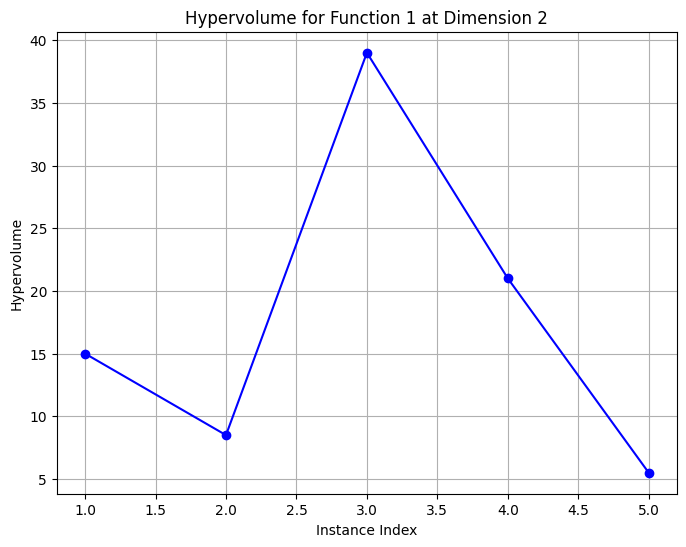

For function: 2 at dimension: 2 the values are:
 [(1, 53, 150.0), (2, 55, 12.0), (3, 54, 130.0), (4, 54, 76.0), (5, 54, 750.0)]


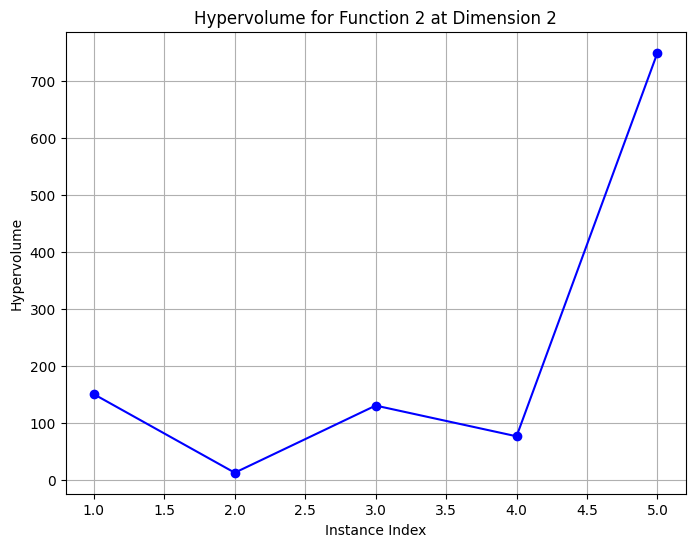

For function: 11 at dimension: 2 the values are:
 [(1, 51, 0.97), (2, 52, 0.68), (3, 51, 2.8), (4, 51, 4.2), (5, 51, 31000.0)]


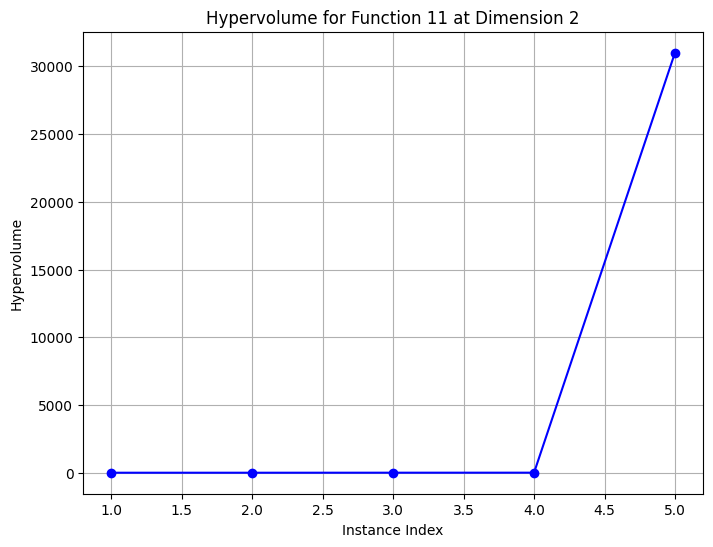

For function: 1 at dimension: 5 the values are:
 [(1, 101, 210.0), (2, 101, 29.0), (3, 101, 42.0), (4, 101, 48.0), (5, 102, 60.0)]


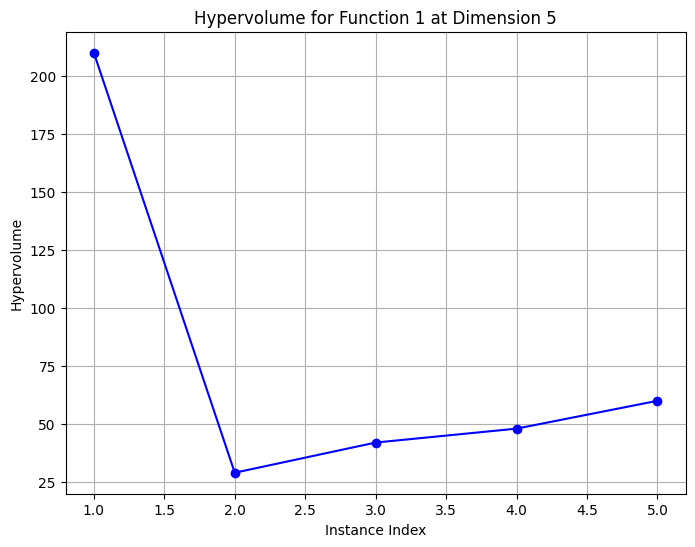

For function: 2 at dimension: 5 the values are:
 [(1, 102, 6.0), (2, 105, 35.0), (3, 102, 340.0), (4, 103, 29.0), (5, 106, 330.0)]


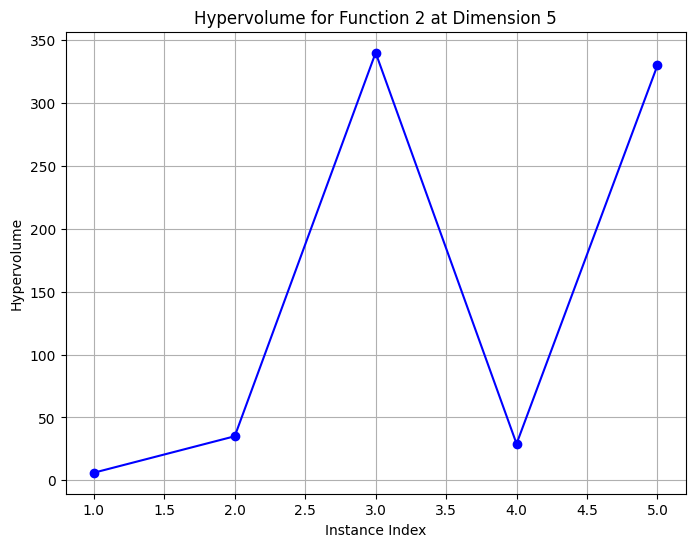

For function: 11 at dimension: 5 the values are:
 [(1, 103, 7.5), (2, 103, 9.3), (3, 101, 100.0), (4, 101, 9.4), (5, 101, 0.95)]


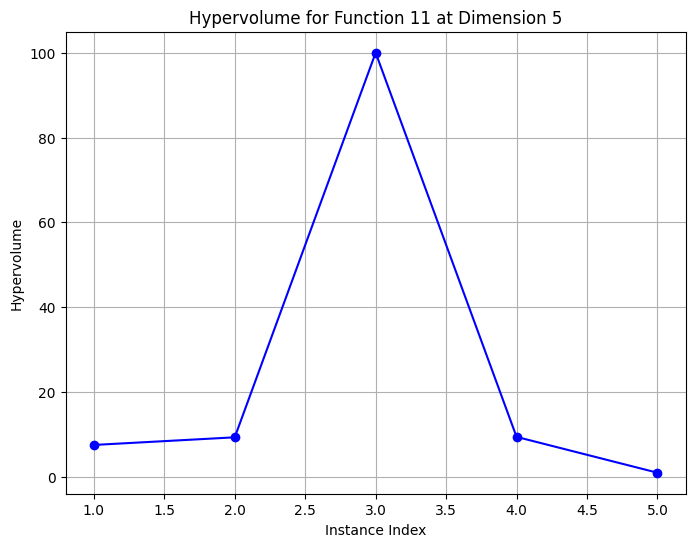

For function: 3 at dimension: 2 the values are:
 [(1, 53, 88.0), (2, 52, 11.0), (3, 53, 140.0), (4, 52, 4000.0), (5, 53, 17.0)]


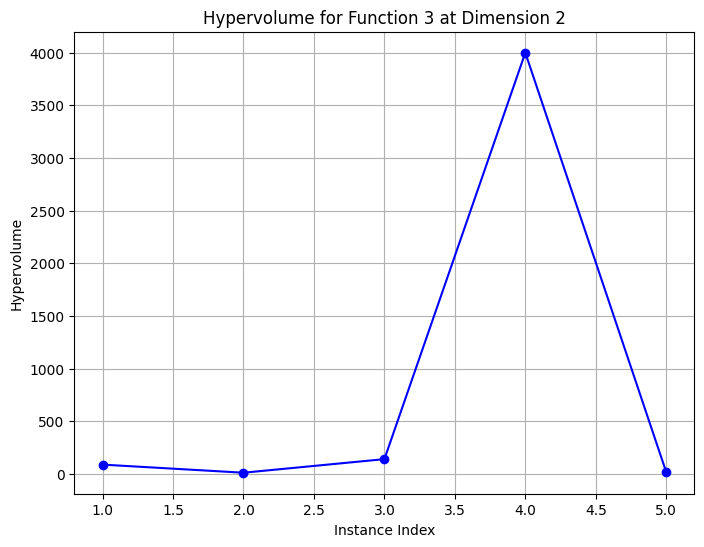

For function: 4 at dimension: 2 the values are:
 [(1, 52, 61.0), (2, 52, 22.0), (3, 52, 22.0), (4, 51, 970.0), (5, 51, 16.0)]


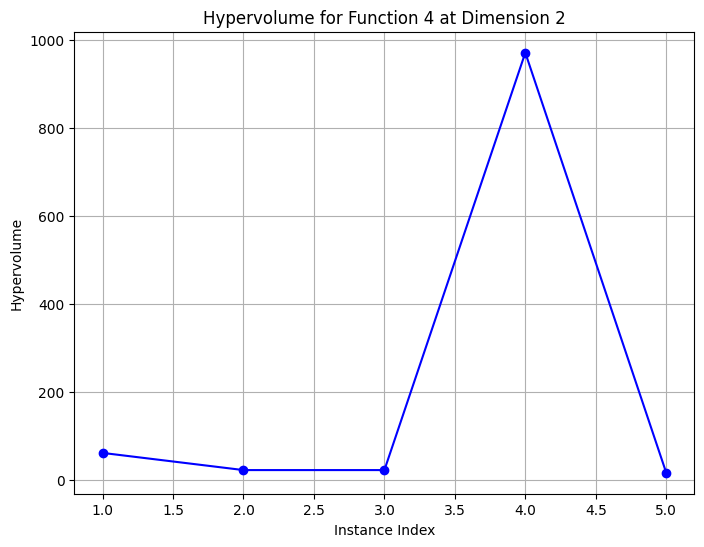

For function: 12 at dimension: 2 the values are:
 [(1, 53, 25.0), (2, 54, 0.29), (3, 52, 1.9), (4, 54, 6.8), (5, 54, 7.1)]


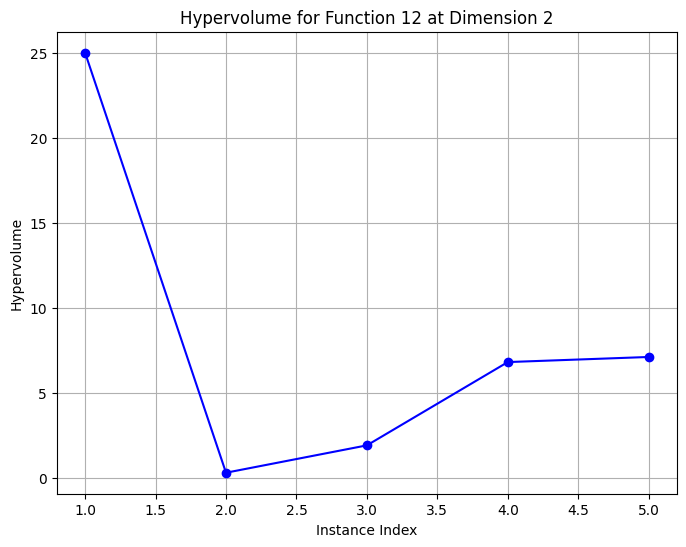

For function: 13 at dimension: 2 the values are:
 [(1, 54, 69000.0), (2, 55, 490.0), (3, 55, 1400.0), (4, 54, 130.0), (5, 54, 34.0)]


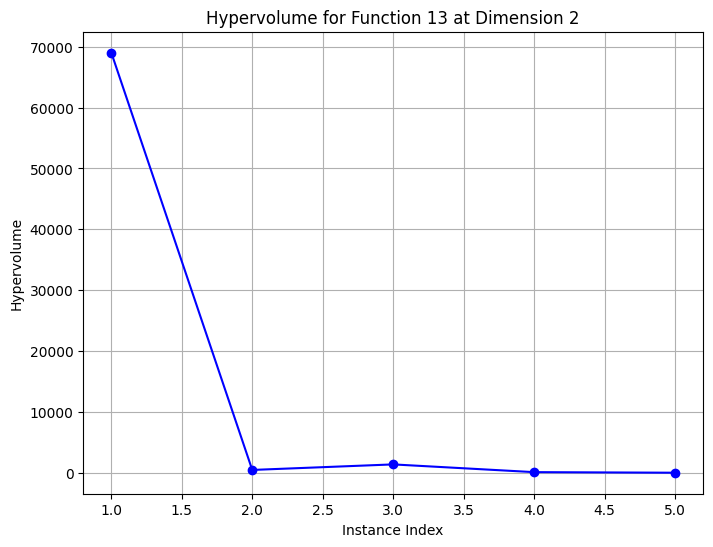

For function: 3 at dimension: 5 the values are:
 [(1, 105, 150.0), (2, 104, 70.0), (3, 105, 650.0), (4, 105, 83.0), (5, 104, 95.0)]


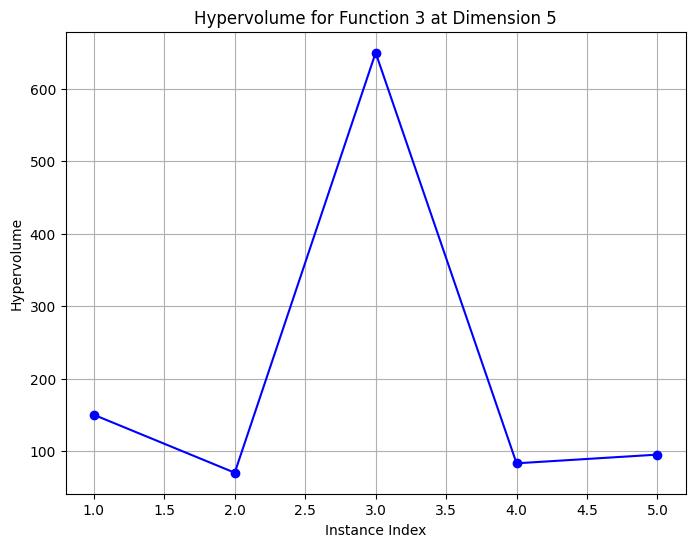

For function: 4 at dimension: 5 the values are:
 [(1, 103, 160.0), (2, 102, 1800.0), (3, 102, 1700.0), (4, 101, 2900.0), (5, 102, 2200.0)]


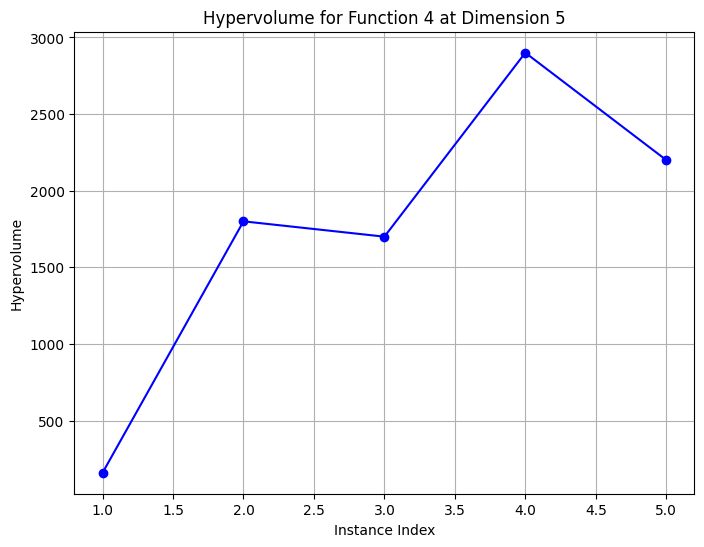

For function: 12 at dimension: 5 the values are:
 [(1, 105, 31.0), (2, 109, 16.0), (3, 105, 600.0), (4, 107, 140.0), (5, 103, 7.2)]


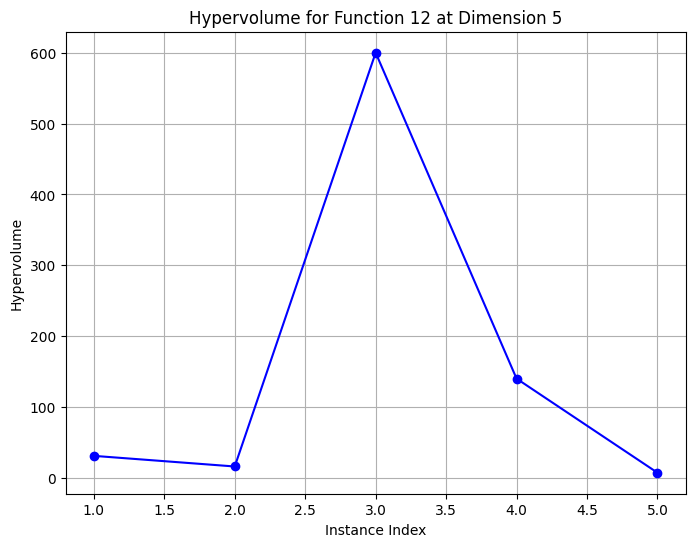

For function: 13 at dimension: 5 the values are:
 [(1, 106, 29000.0), (2, 104, 960.0), (3, 103, 42000.0), (4, 105, 23000.0), (5, 106, 6000.0)]


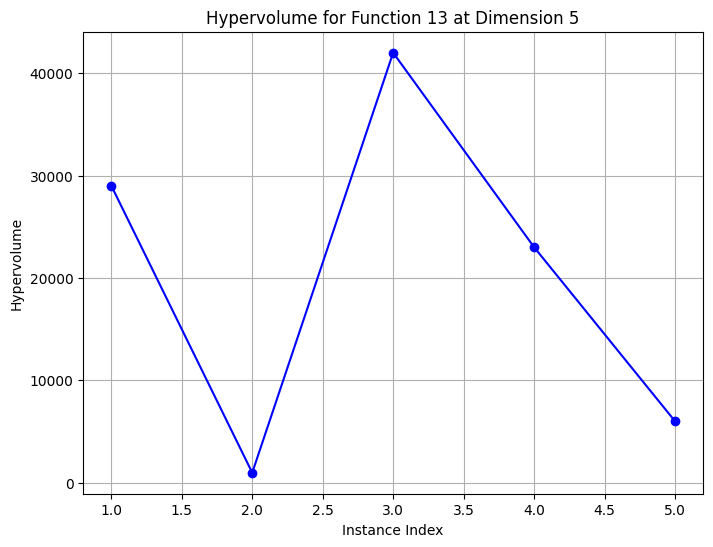

For function: 5 at dimension: 2 the values are:
 [(1, 52, 8.8), (2, 53, 17.0), (3, 52, 39.0), (4, 53, 16.0), (5, 52, 12.0)]


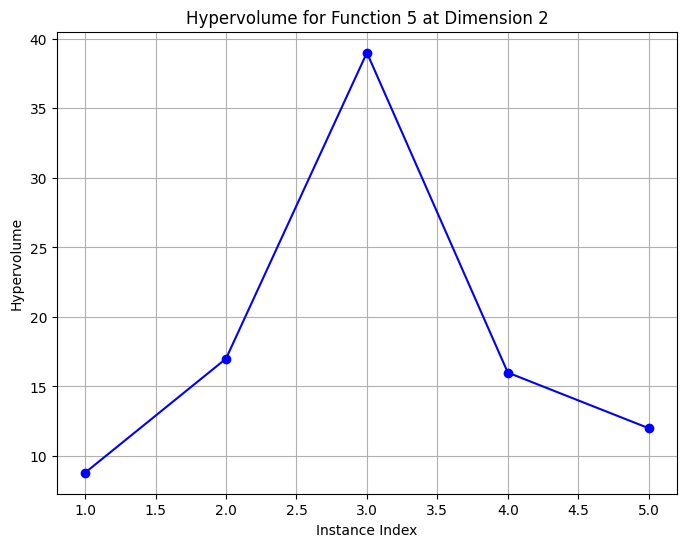

For function: 6 at dimension: 2 the values are:
 [(1, 53, 22.0), (2, 53, 6.8), (3, 52, 67.0), (4, 54, 15.0), (5, 54, 18.0)]


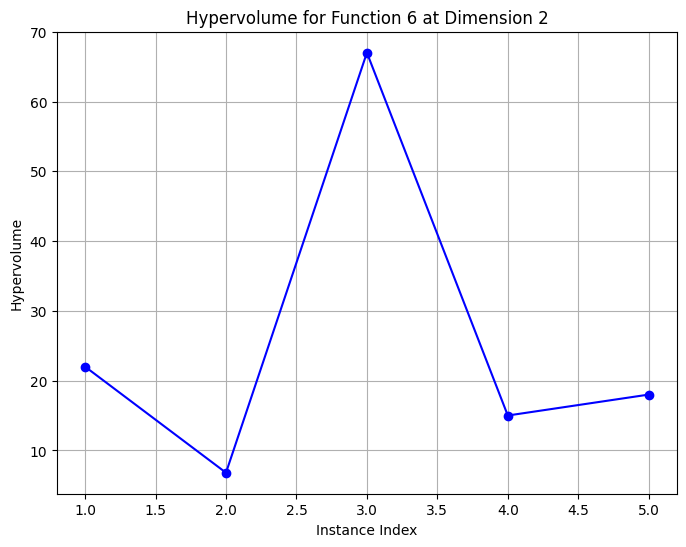

For function: 14 at dimension: 2 the values are:
 [(1, 54, 20.0), (2, 53, 18.0), (3, 54, 13.0), (4, 52, 17.0), (5, 55, 7.3)]


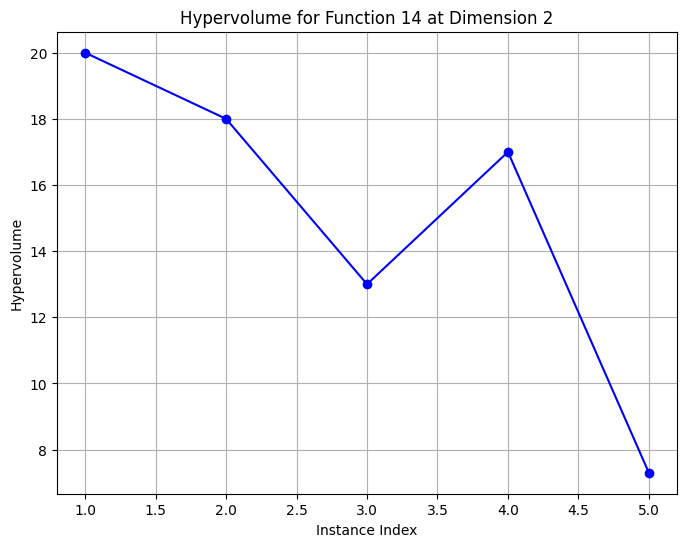

For function: 15 at dimension: 2 the values are:
 [(1, 51, 0.71), (2, 56, 370.0), (3, 55, 8800.0), (4, 51, 4.6), (5, 57, 14.0)]


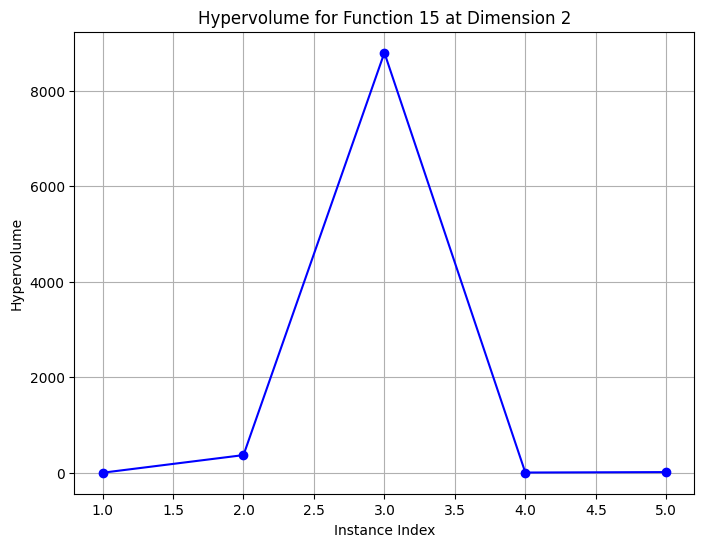

For function: 5 at dimension: 5 the values are:
 [(1, 102, 30.0), (2, 101, 68.0), (3, 101, 170.0), (4, 103, 33.0), (5, 102, 78.0)]


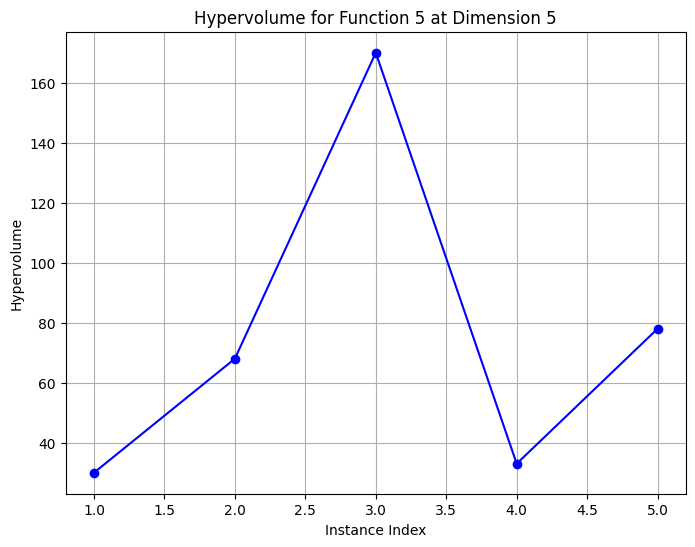

For function: 6 at dimension: 5 the values are:
 [(1, 102, 67.0), (2, 103, 270.0), (3, 101, 140.0), (4, 105, 87.0), (5, 104, 92.0)]


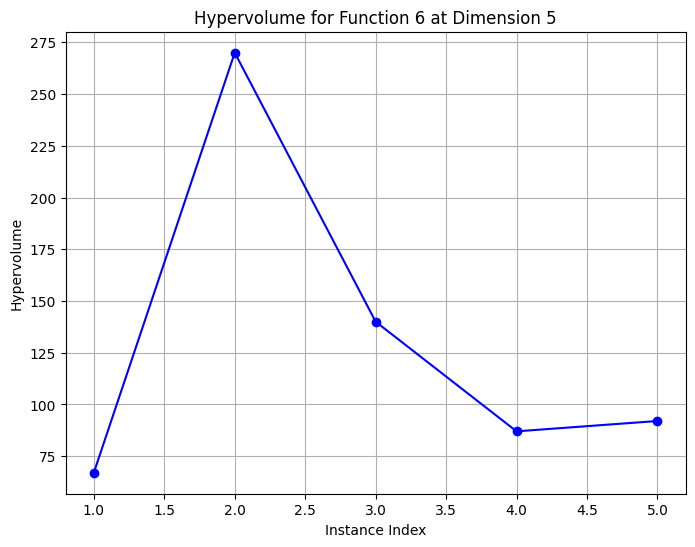

For function: 14 at dimension: 5 the values are:
 [(1, 101, 17.0), (2, 101, 13.0), (3, 104, 51.0), (4, 103, 16.0), (5, 102, 7.4)]


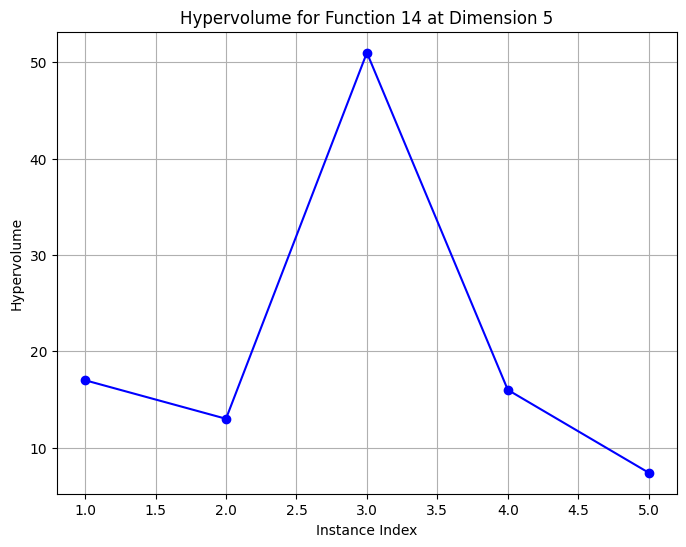

For function: 15 at dimension: 5 the values are:
 [(1, 105, 160.0), (2, 107, 1900.0), (3, 105, 28.0), (4, 104, 250.0), (5, 102, 97.0)]


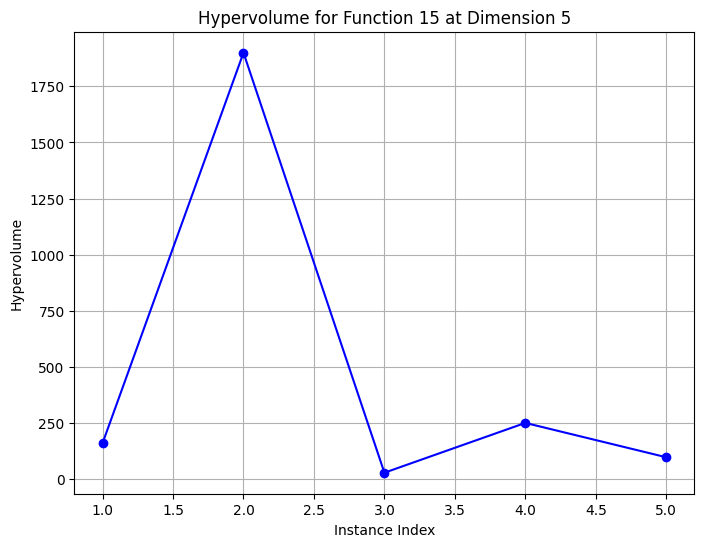

For function: 7 at dimension: 2 the values are:
 [(1, 55, 1000.0), (2, 54, 64.0), (3, 52, 40.0), (4, 53, 48.0), (5, 51, 12.0)]


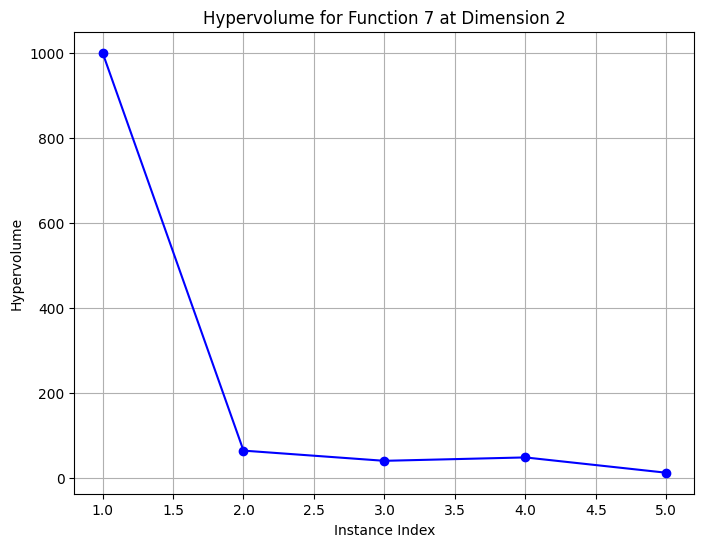

For function: 8 at dimension: 2 the values are:
 [(1, 51, 44.0), (2, 51, 220.0), (3, 51, 170.0), (4, 51, 480.0), (5, 51, 1300.0)]


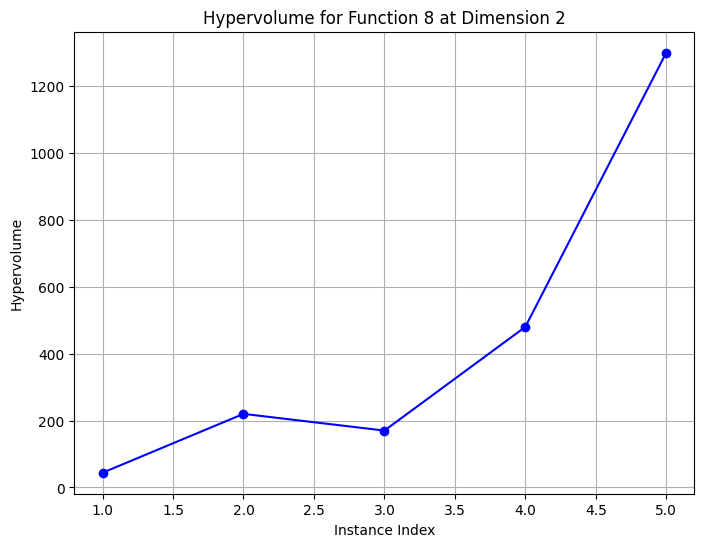

For function: 16 at dimension: 2 the values are:
 [(1, 53, 21.0), (2, 51, 9.6), (3, 54, 22.0), (4, 52, 31.0), (5, 54, 12.0)]


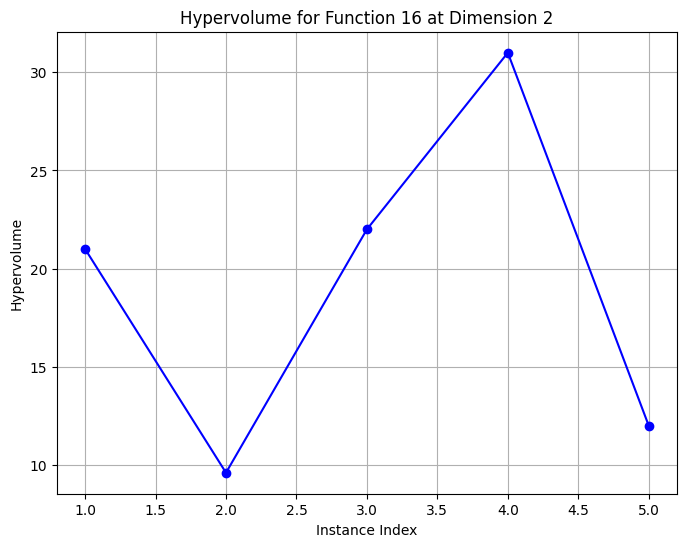

For function: 17 at dimension: 2 the values are:
 [(1, 53, 130.0), (2, 55, 48.0), (3, 53, 760.0), (4, 55, 360.0), (5, 54, 1500.0)]


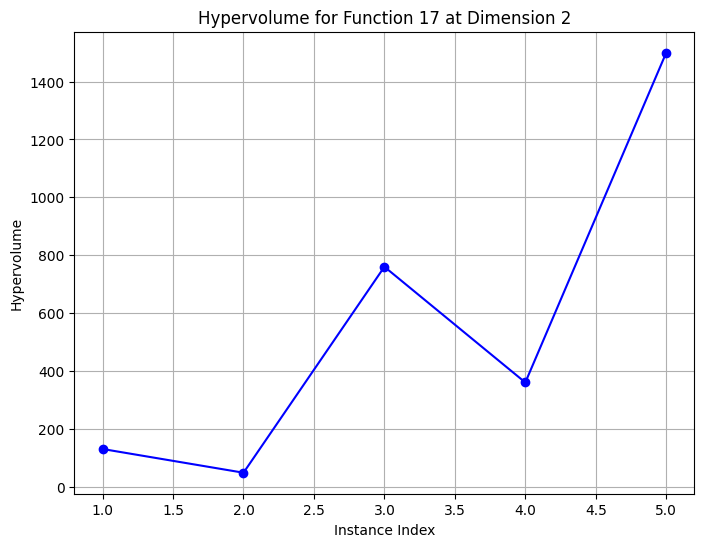

For function: 7 at dimension: 5 the values are:
 [(1, 101, 53.0), (2, 107, 160.0), (3, 103, 190.0), (4, 105, 120.0), (5, 103, 64.0)]


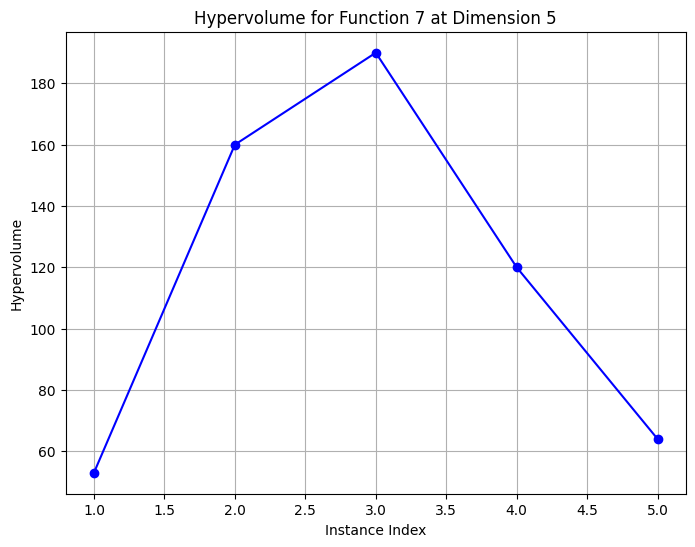

For function: 8 at dimension: 5 the values are:
 [(1, 102, 840.0), (2, 102, 2800.0), (3, 102, 3800.0), (4, 102, 3900.0), (5, 101, 390.0)]


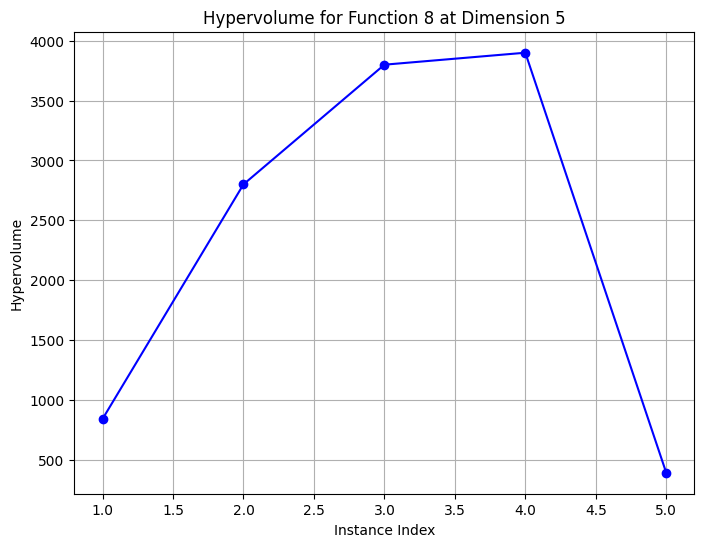

For function: 16 at dimension: 5 the values are:
 [(1, 104, 200.0), (2, 110, 180.0), (3, 108, 110.0), (4, 105, 200.0), (5, 102, 35.0)]


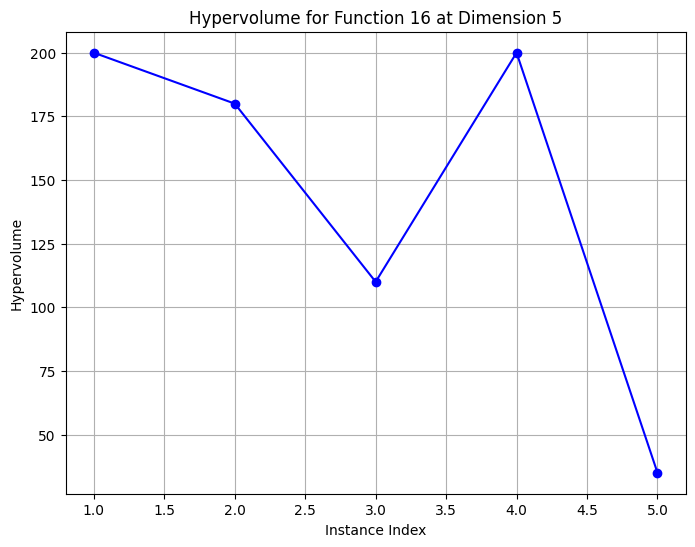

For function: 17 at dimension: 5 the values are:
 [(1, 104, 2000.0), (2, 106, 57000.0), (3, 102, 2200.0), (4, 105, 970.0), (5, 101, 480.0)]


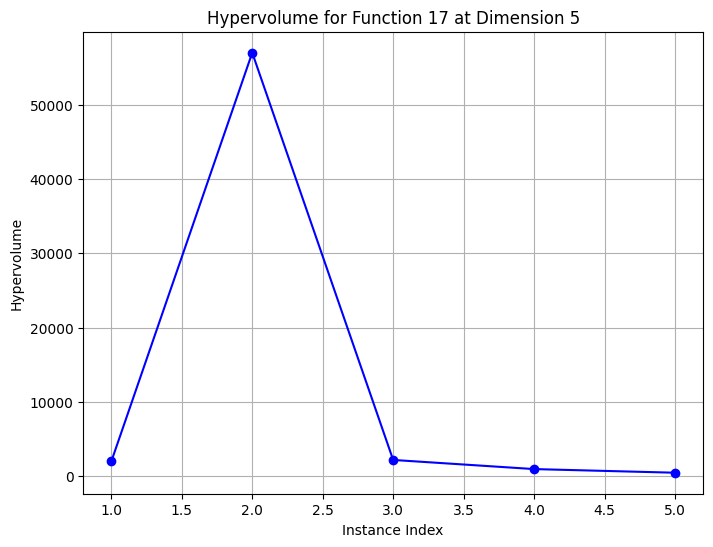

For function: 9 at dimension: 2 the values are:
 [(1, 52, 110.0), (2, 54, 37.0), (3, 54, 120.0), (4, 53, 740.0), (5, 54, 180.0)]


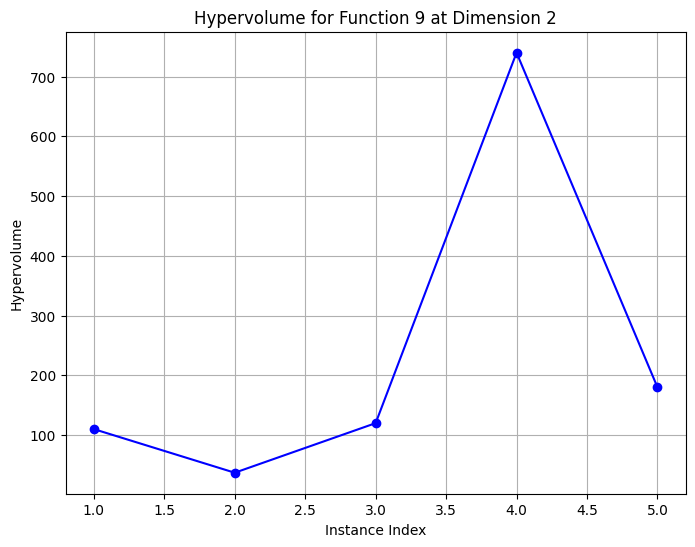

For function: 10 at dimension: 2 the values are:
 [(1, 52, 18.0), (2, 51, 290.0), (3, 51, 46.0), (4, 51, 13.0), (5, 51, 110.0)]


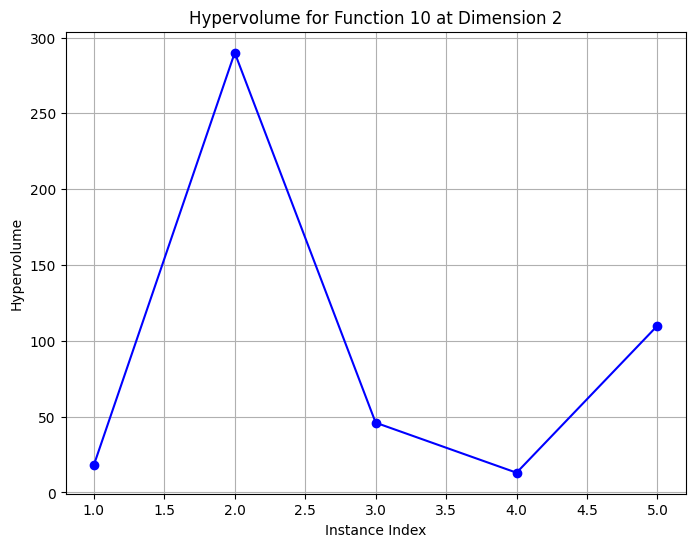

For function: 18 at dimension: 2 the values are:
 [(1, 52, 3.0), (2, 51, 4.3), (3, 51, 4800.0), (4, 52, 260.0), (5, 51, 48.0)]


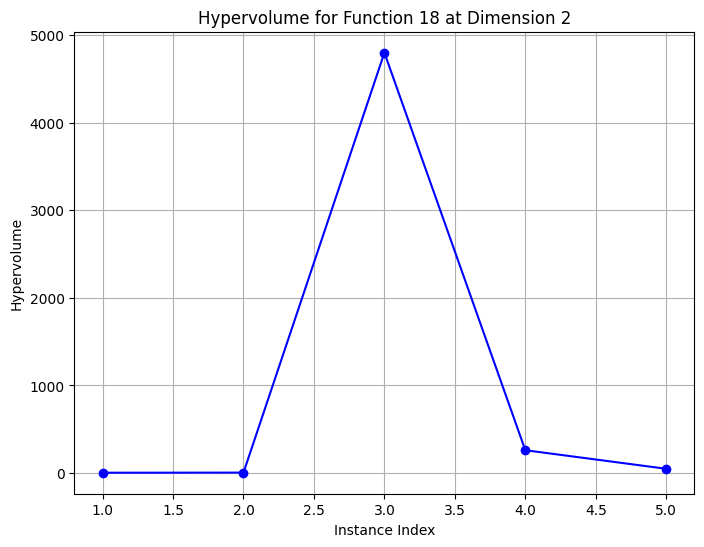

For function: 19 at dimension: 2 the values are:
 [(1, 54, 54.0), (2, 54, 30.0), (3, 54, 48.0), (4, 54, 110.0), (5, 54, 43000.0)]


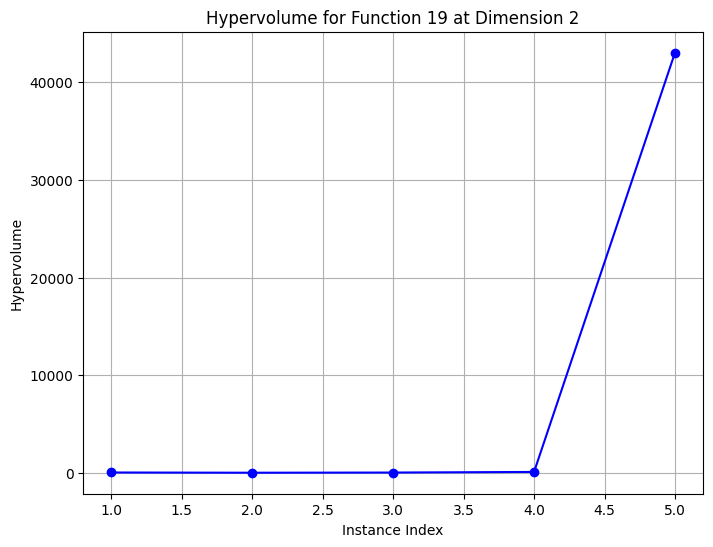

For function: 9 at dimension: 5 the values are:
 [(1, 103, 150.0), (2, 102, 54.0), (3, 101, 43.0), (4, 101, 63.0), (5, 102, 820.0)]


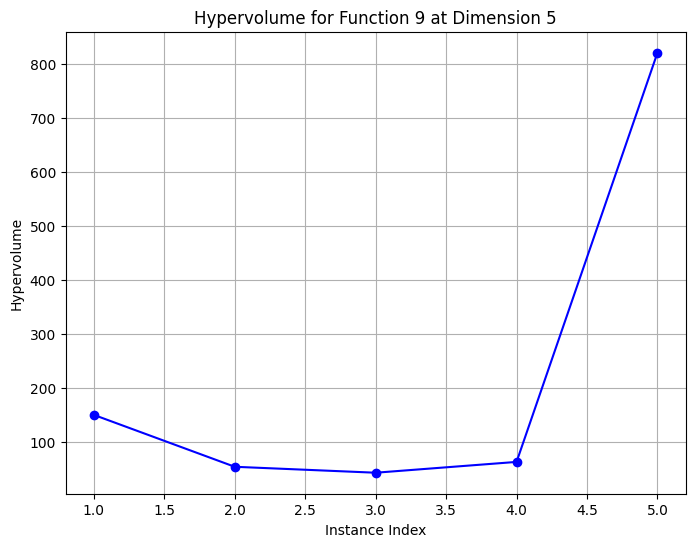

For function: 10 at dimension: 5 the values are:
 [(1, 101, 95.0), (2, 101, 250.0), (3, 101, 79.0), (4, 102, 74.0), (5, 101, 49.0)]


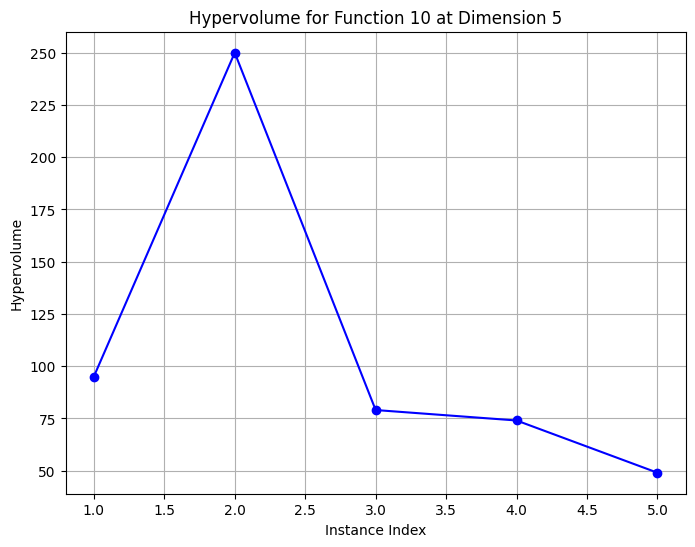

For function: 18 at dimension: 5 the values are:
 [(1, 104, 1100.0), (2, 104, 230.0), (3, 101, 38.0), (4, 102, 560.0), (5, 105, 66.0)]


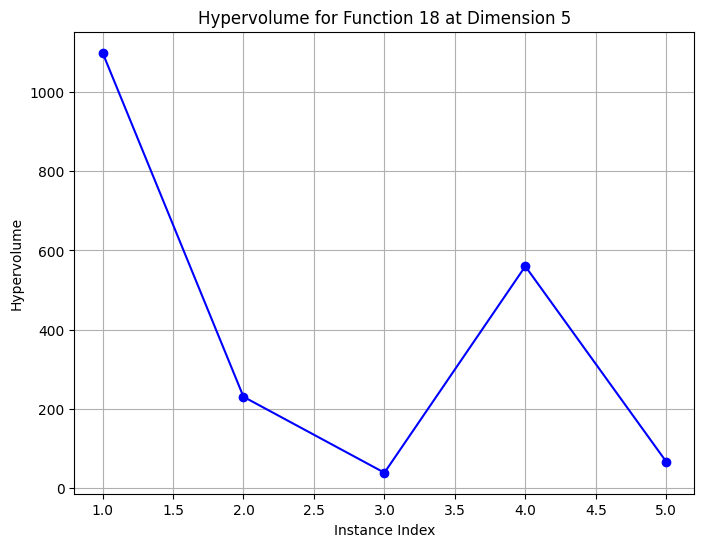

For function: 19 at dimension: 5 the values are:
 [(1, 103, 87.0), (2, 104, 110.0), (3, 106, 66.0), (4, 102, 34.0), (5, 105, 66.0)]


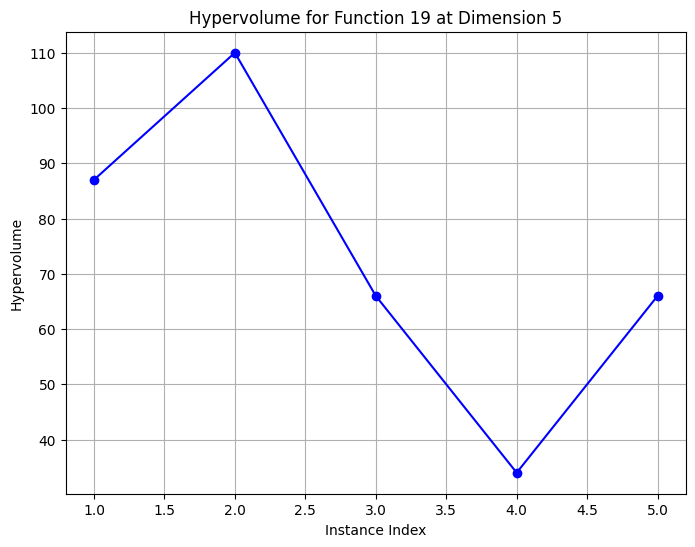

For function: 20 at dimension: 2 the values are:
 [(1, 54, 0.14), (2, 58, 47000.0), (3, 55, 82.0), (4, 55, 98.0), (5, 53, 5.5)]


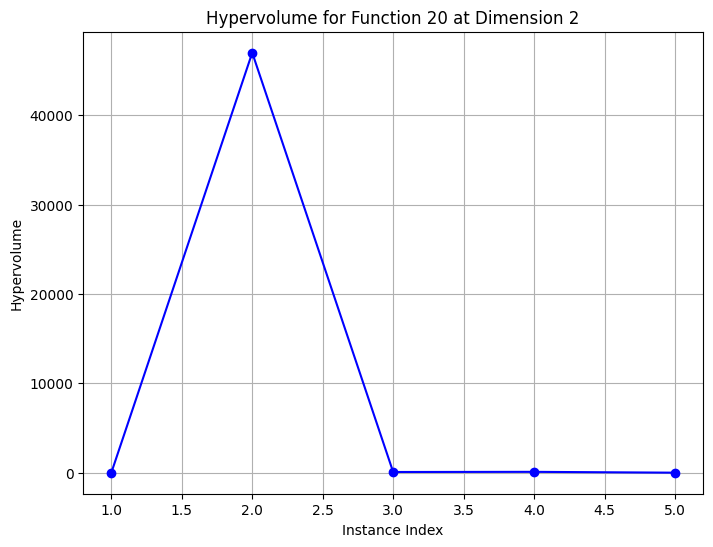

For function: 21 at dimension: 2 the values are:
 [(1, 52, 510.0), (2, 53, 21000.0), (3, 54, 2600.0), (4, 56, 1400.0), (5, 51, 160.0)]


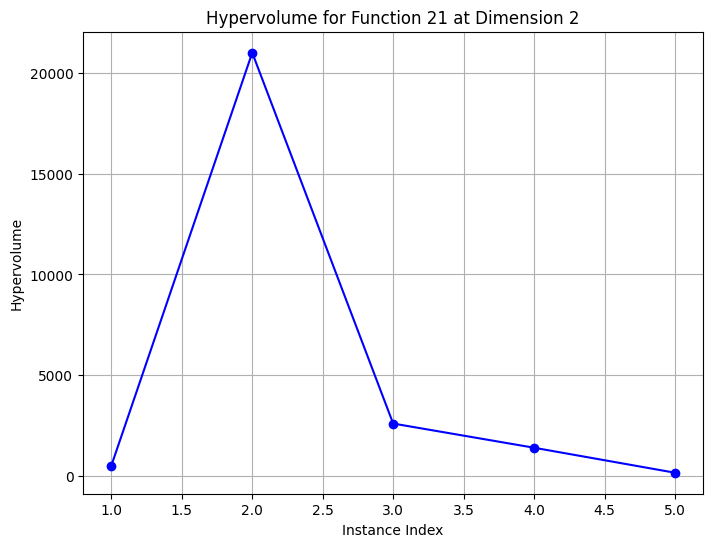

For function: 28 at dimension: 2 the values are:
 [(1, 52, 6500.0), (2, 52, 780.0), (3, 52, 190.0), (4, 52, 25000.0), (5, 52, 80.0)]


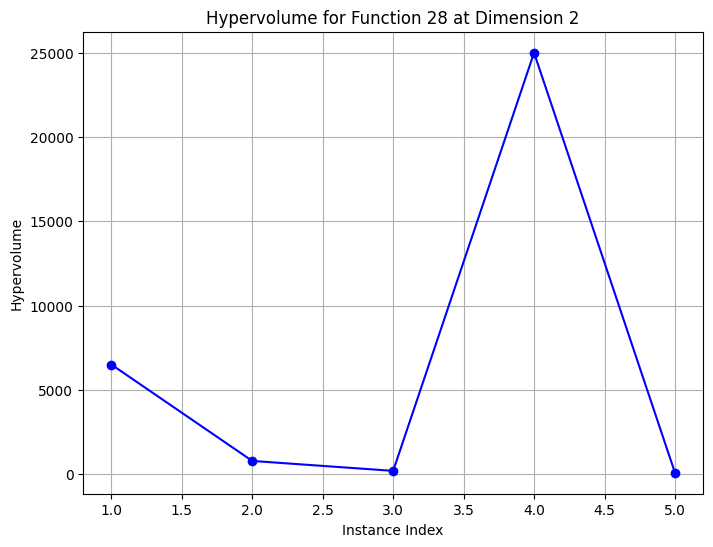

For function: 20 at dimension: 5 the values are:
 [(1, 103, 12.0), (2, 105, 7.6), (3, 105, 100.0), (4, 111, 390.0), (5, 110, 54.0)]


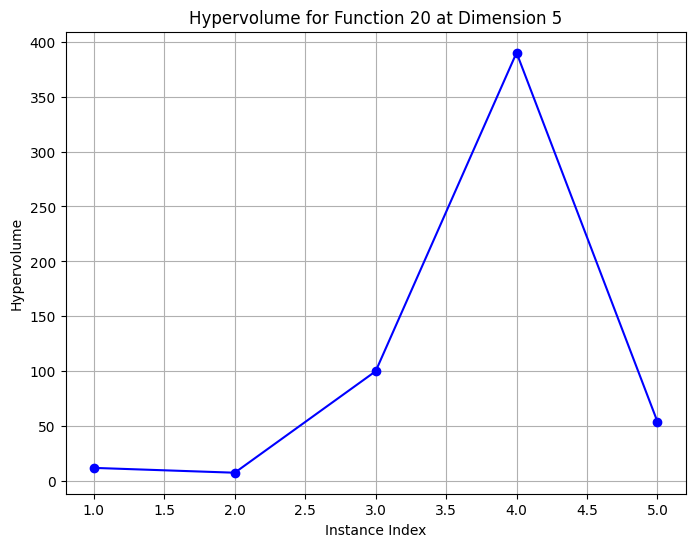

For function: 21 at dimension: 5 the values are:
 [(1, 104, 9800.0), (2, 106, 4500.0), (3, 103, 5700.0), (4, 106, 28000.0), (5, 103, 70000.0)]


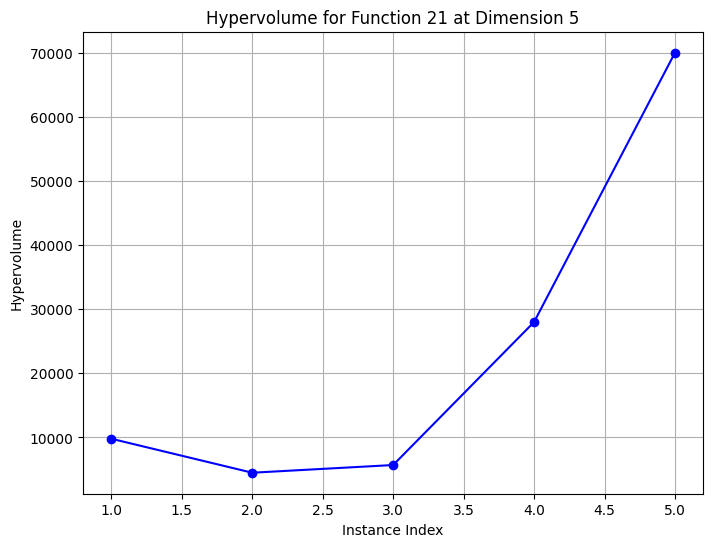

For function: 28 at dimension: 5 the values are:
 [(1, 101, 19000.0), (2, 101, 99000.0), (3, 101, 9400.0), (4, 101, 1600.0), (5, 101, 45000.0)]


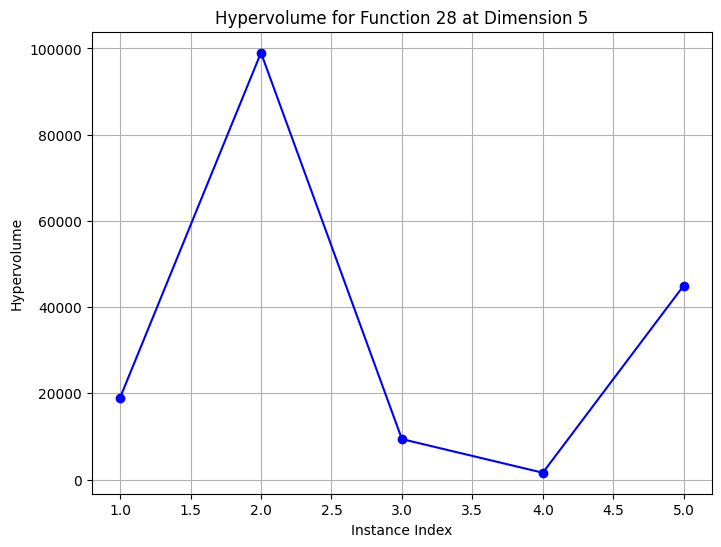

For function: 22 at dimension: 2 the values are:
 [(1, 55, 180.0), (2, 51, 2.4), (3, 53, 49.0), (4, 56, 7.7), (5, 52, 39.0)]


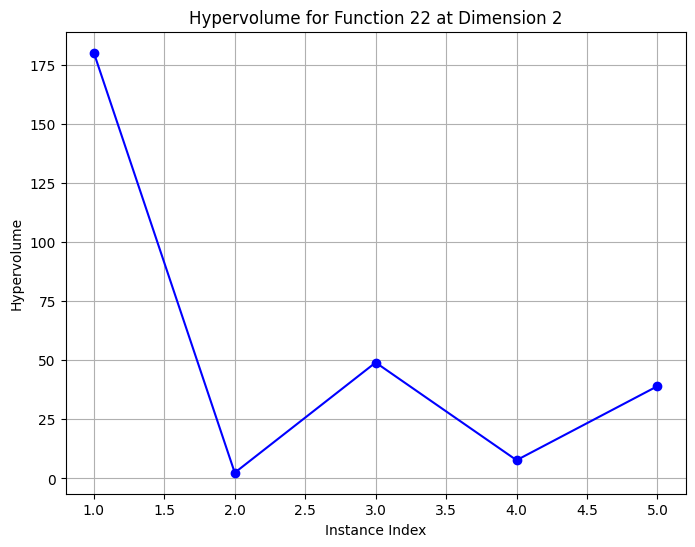

For function: 23 at dimension: 2 the values are:
 [(1, 52, 0.99), (2, 58, 26.0), (3, 53, 0.98), (4, 55, 0.35), (5, 54, 160.0)]


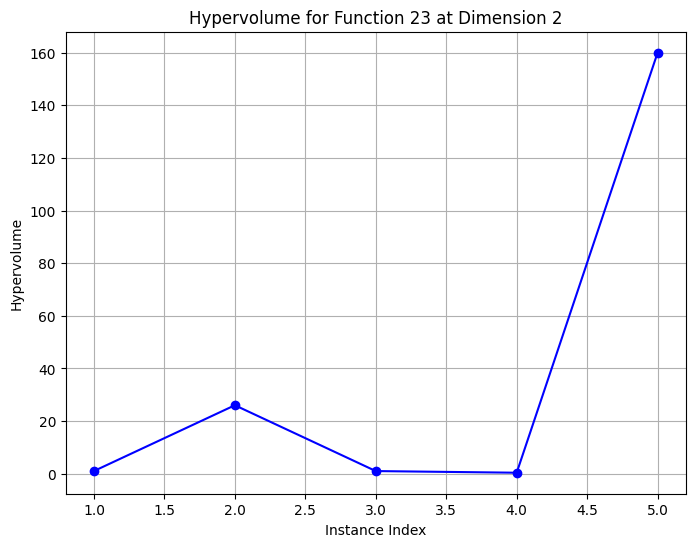

For function: 29 at dimension: 2 the values are:
 [(1, 52, 5.0), (2, 53, 24.0), (3, 52, 930.0), (4, 54, 21.0), (5, 53, 14000.0)]


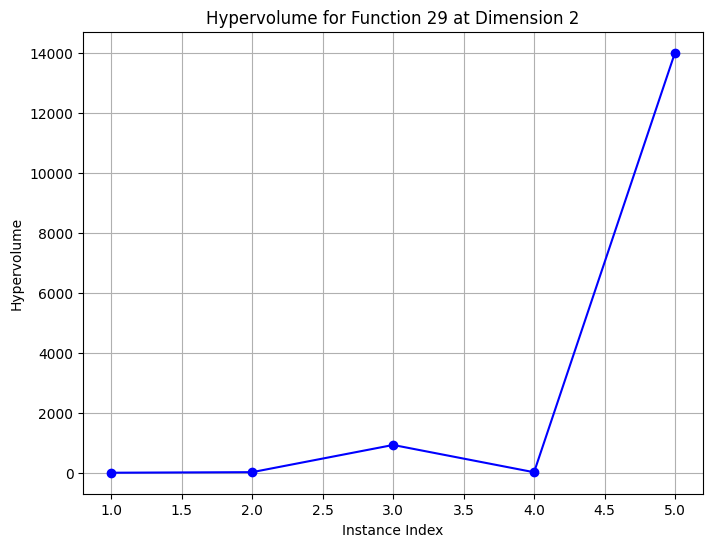

For function: 30 at dimension: 2 the values are:
 [(1, 55, 57.0), (2, 53, 31.0), (3, 53, 36.0), (4, 55, 130.0), (5, 55, 1600.0)]


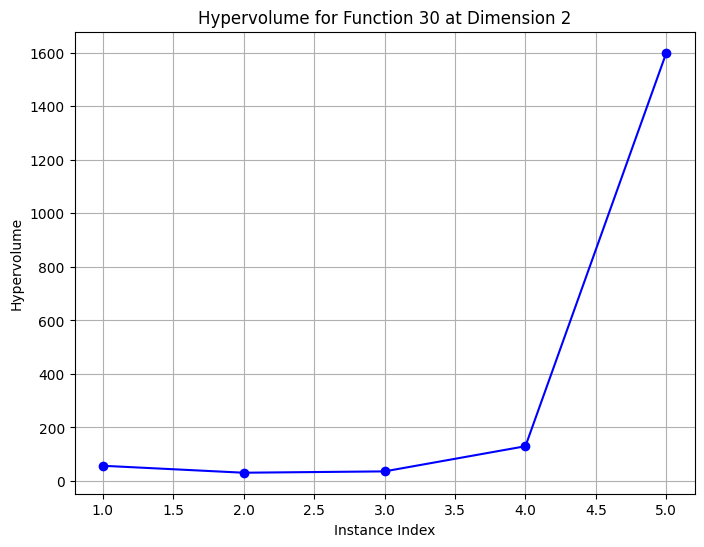

For function: 22 at dimension: 5 the values are:
 [(1, 108, 11.0), (2, 103, 18.0), (3, 108, 16.0), (4, 103, 12.0), (5, 110, 20.0)]


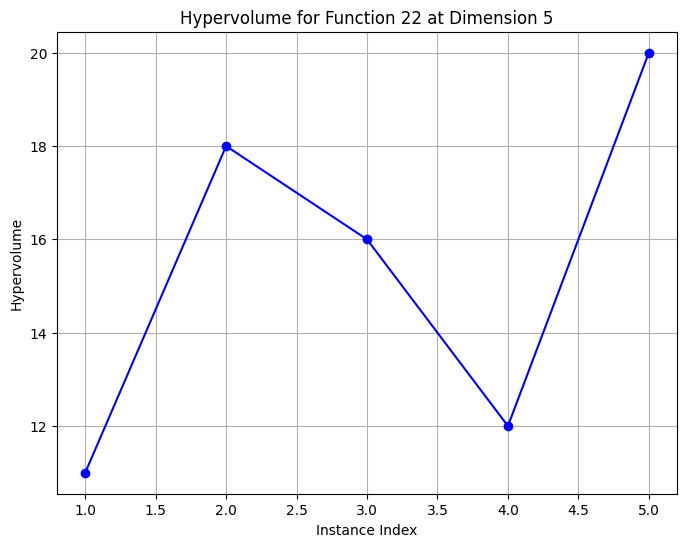

For function: 23 at dimension: 5 the values are:
 [(1, 105, 77.0), (2, 107, 57.0), (3, 104, 200.0), (4, 106, 37.0), (5, 106, 130.0)]


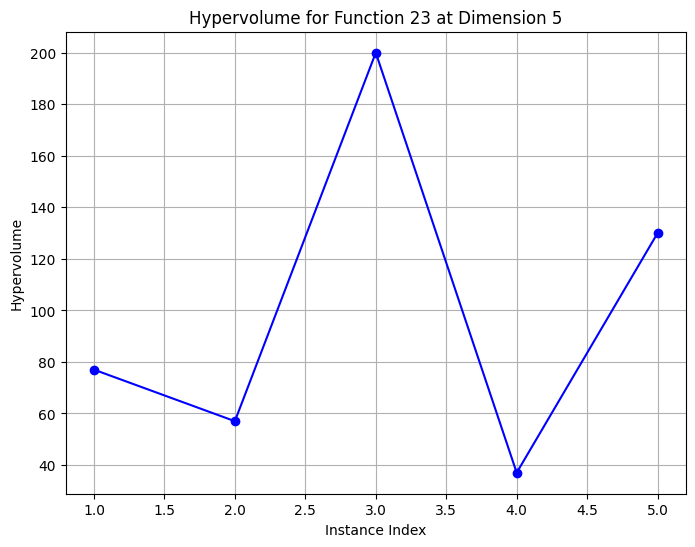

For function: 29 at dimension: 5 the values are:
 [(1, 101, 16000.0), (2, 102, 5600.0), (3, 101, 2000.0), (4, 104, 2700.0), (5, 104, 250000.0)]


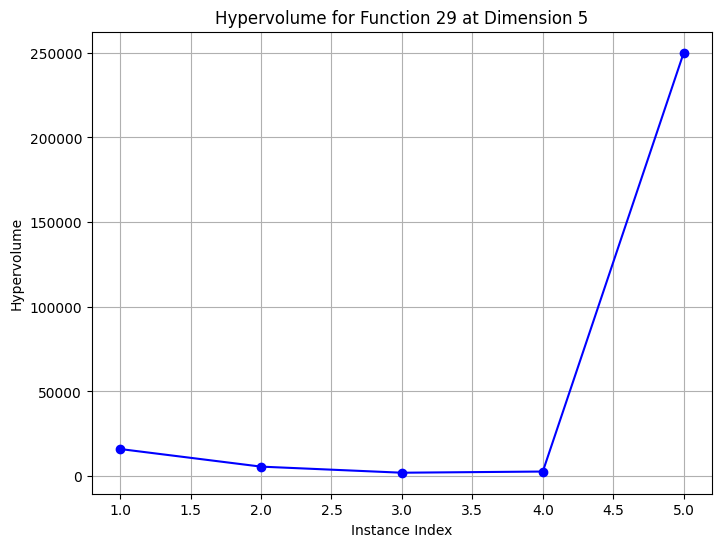

For function: 30 at dimension: 5 the values are:
 [(1, 103, 4100.0), (2, 104, 9100.0), (3, 104, 43000.0), (4, 101, 2000.0), (5, 103, 37000.0)]


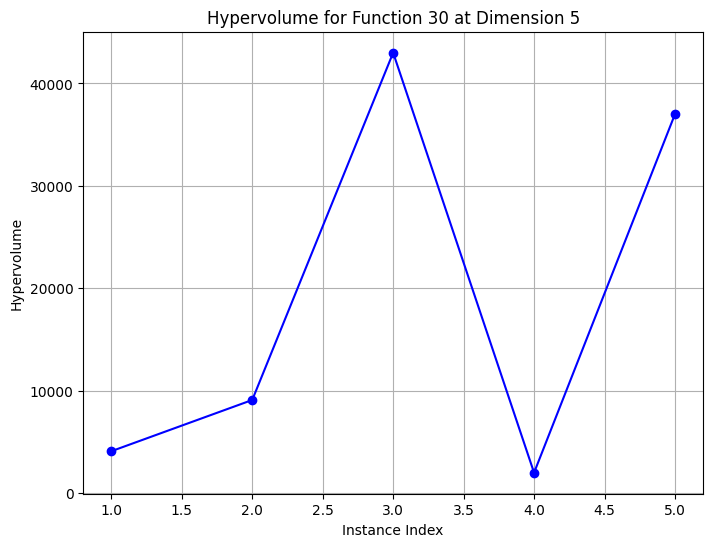

For function: 24 at dimension: 2 the values are:
 [(1, 54, 14.0), (2, 52, 22.0), (3, 54, 66.0), (4, 52, 28.0), (5, 51, 64.0)]


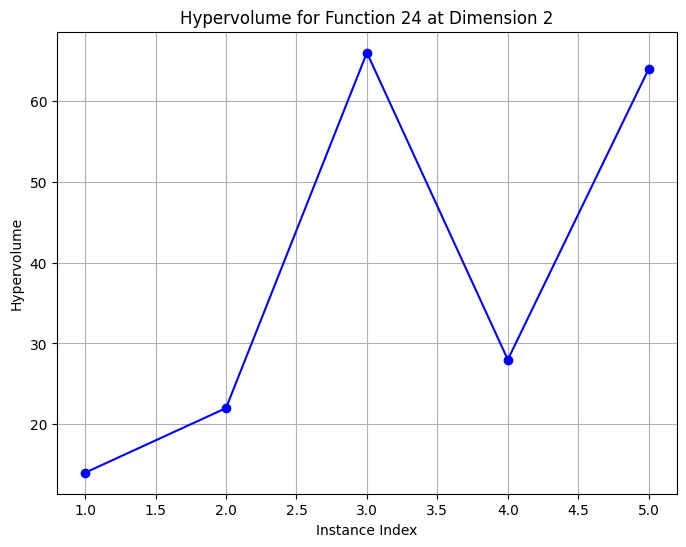

For function: 25 at dimension: 2 the values are:
 [(1, 54, 180.0), (2, 57, 70.0), (3, 54, 380.0), (4, 54, 400.0), (5, 51, 35.0)]


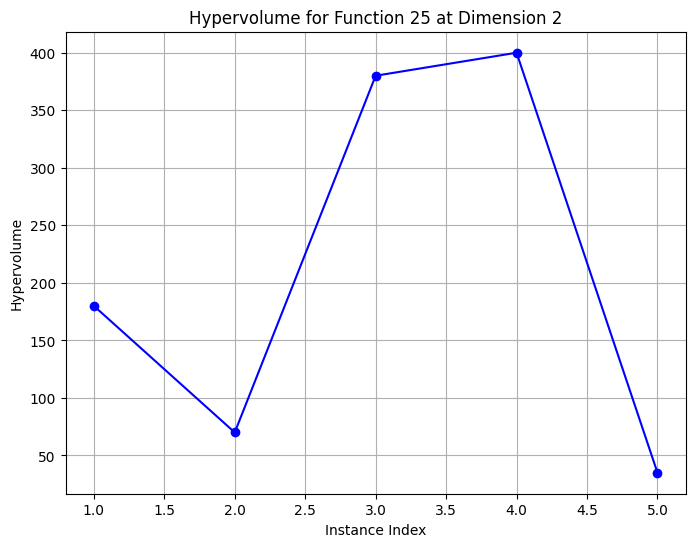

For function: 31 at dimension: 2 the values are:
 [(1, 56, 360.0), (2, 54, 2300.0), (3, 52, 890.0), (4, 52, 32.0), (5, 52, 27.0)]


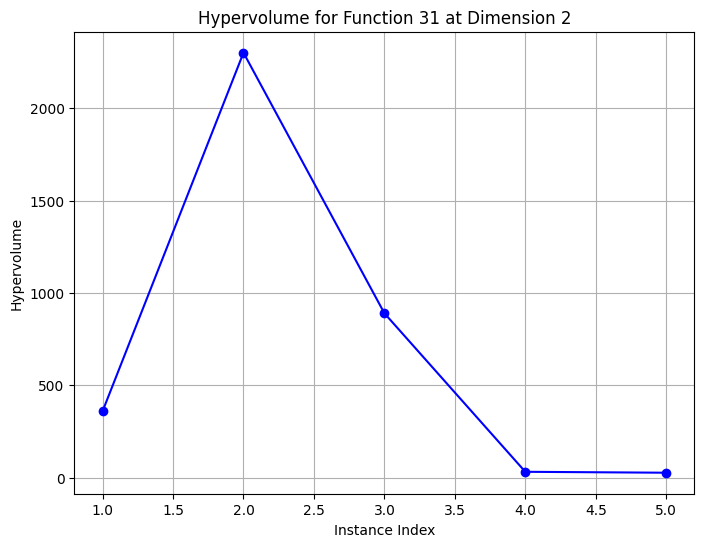

For function: 32 at dimension: 2 the values are:
 [(1, 53, 460.0), (2, 51, 880.0), (3, 51, 400.0), (4, 52, 4200.0), (5, 52, 140.0)]


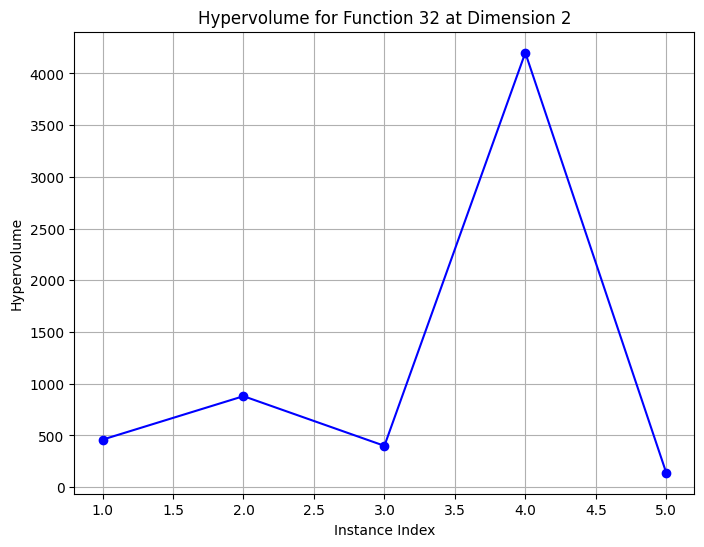

For function: 24 at dimension: 5 the values are:
 [(1, 101, 28.0), (2, 108, 210.0), (3, 104, 58.0), (4, 103, 66.0), (5, 105, 200.0)]


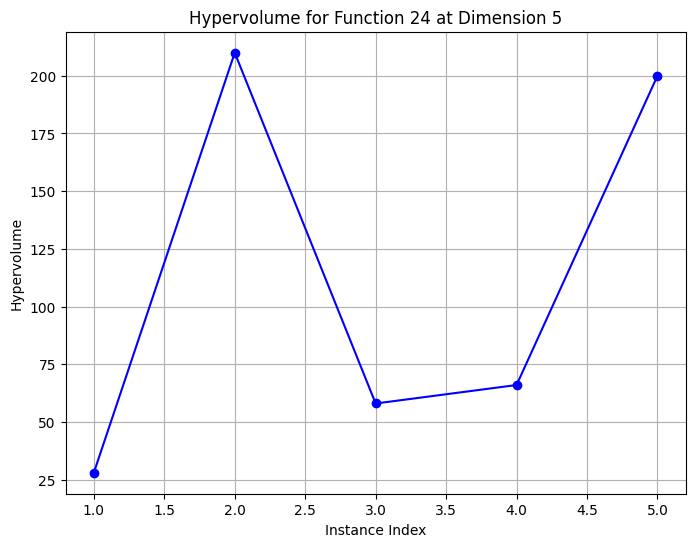

For function: 25 at dimension: 5 the values are:
 [(1, 106, 1500.0), (2, 103, 980.0), (3, 103, 8900.0), (4, 106, 1100.0), (5, 106, 1700.0)]


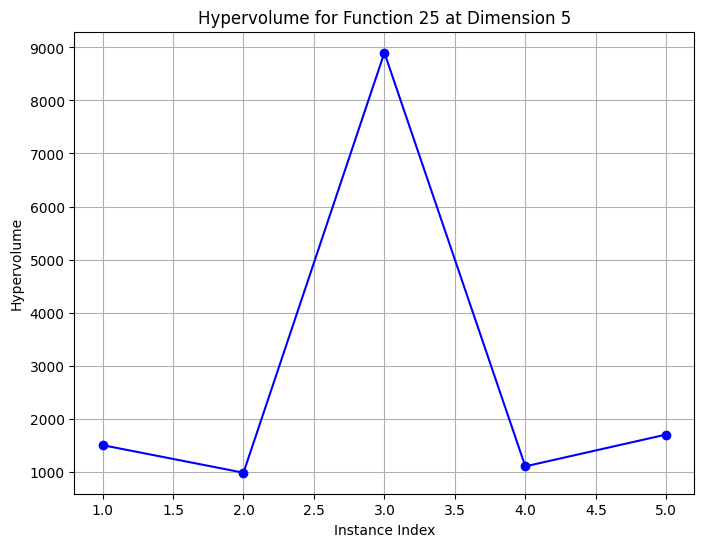

For function: 31 at dimension: 5 the values are:
 [(1, 103, 14000.0), (2, 106, 35000.0), (3, 106, 7000.0), (4, 105, 6300.0), (5, 105, 13000.0)]


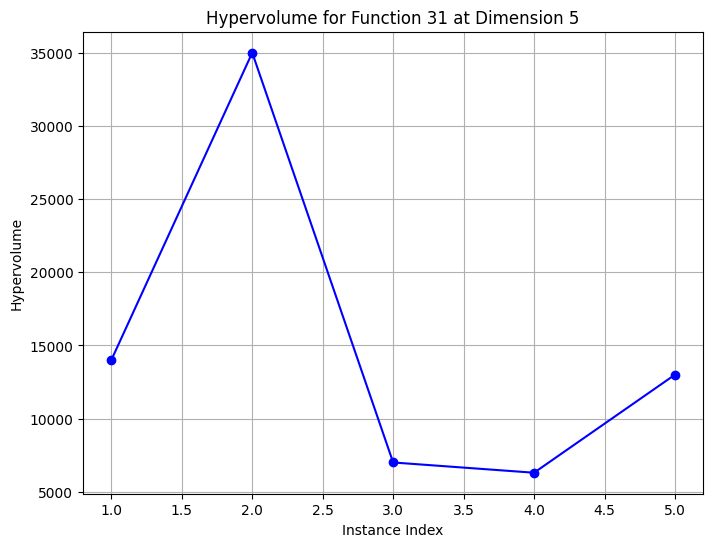

For function: 32 at dimension: 5 the values are:
 [(1, 103, 4000.0), (2, 104, 370000.0), (3, 103, 46000.0), (4, 104, 180000.0), (5, 101, 980.0)]


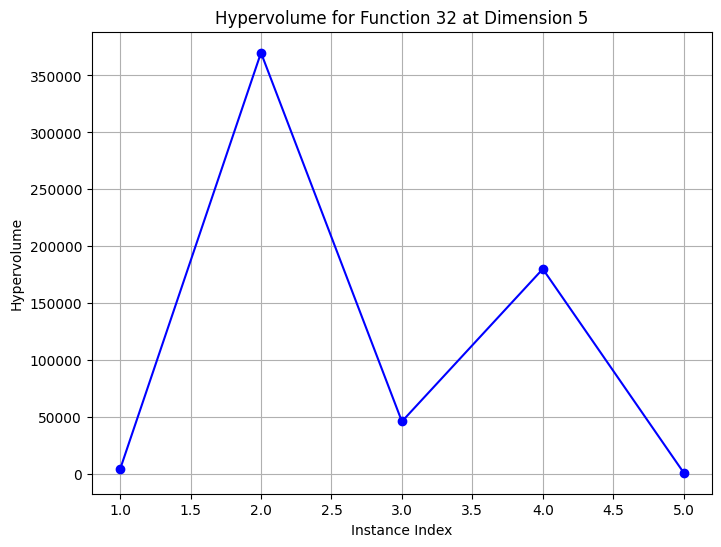

For function: 26 at dimension: 2 the values are:
 [(1, 55, 17.0), (2, 52, 380.0), (3, 55, 95.0), (4, 56, 68.0), (5, 54, 180000.0)]


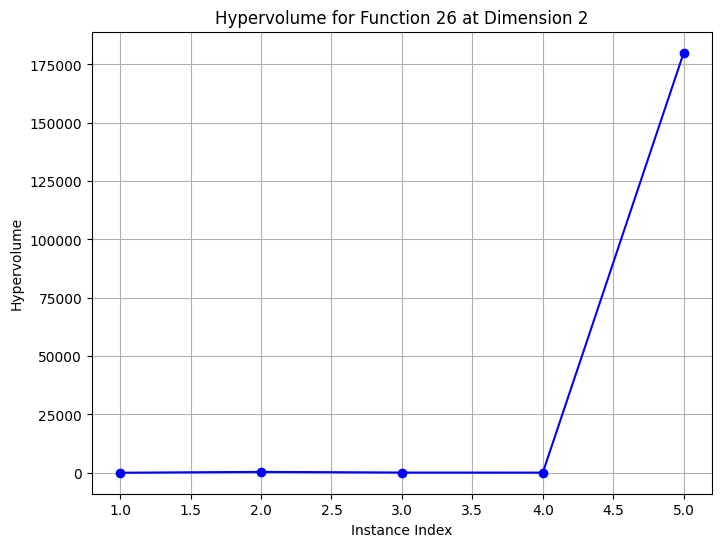

For function: 27 at dimension: 2 the values are:
 [(1, 53, 39.0), (2, 53, 25.0), (3, 52, 110.0), (4, 53, 13.0), (5, 51, 75.0)]


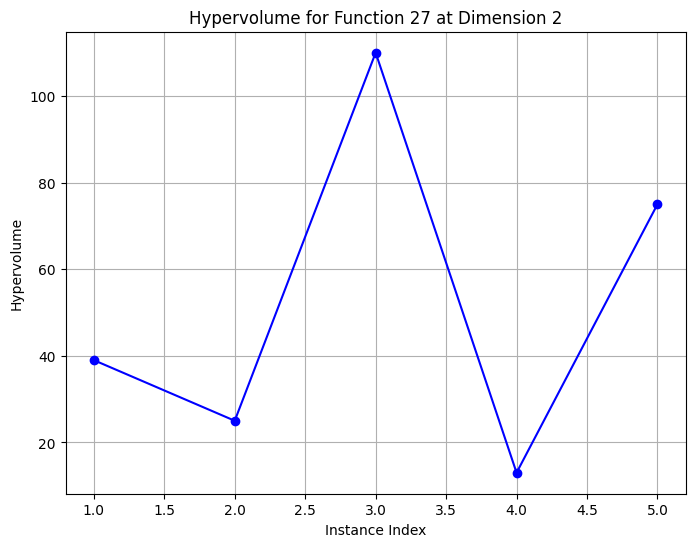

For function: 33 at dimension: 2 the values are:
 [(1, 54, 80.0), (2, 54, 4400.0), (3, 54, 470.0), (4, 54, 45000.0), (5, 55, 700.0)]


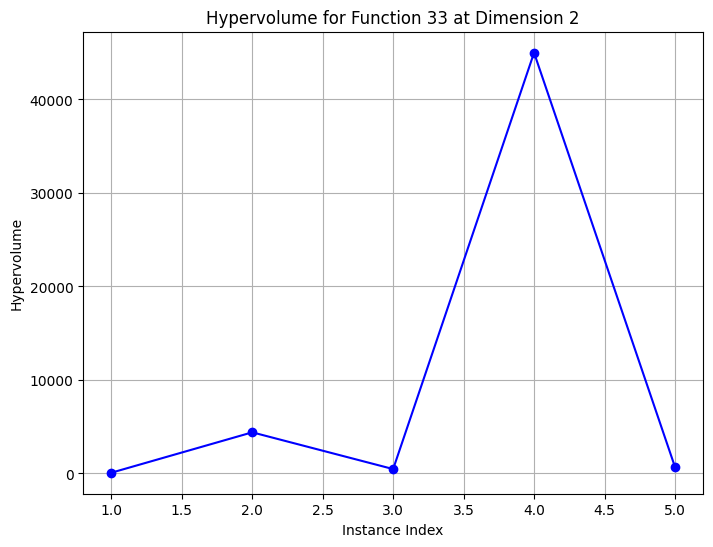

For function: 34 at dimension: 2 the values are:
 [(1, 52, 38.0), (2, 51, 1300.0), (3, 51, 3500.0), (4, 52, 21.0), (5, 52, 380.0)]


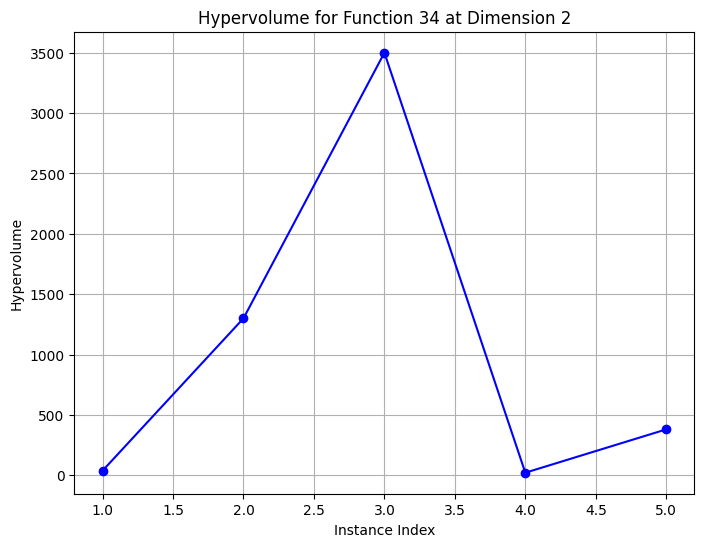

For function: 26 at dimension: 5 the values are:
 [(1, 107, 19000.0), (2, 105, 680.0), (3, 102, 40.0), (4, 103, 410.0), (5, 104, 10000.0)]


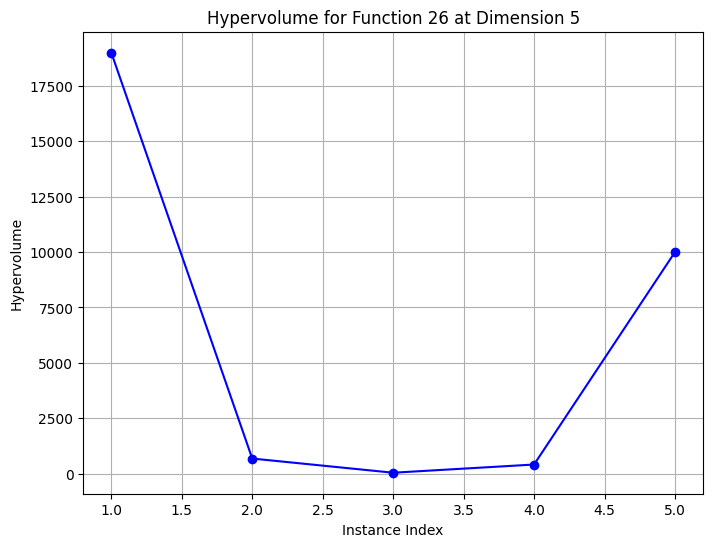

For function: 27 at dimension: 5 the values are:
 [(1, 103, 45.0), (2, 104, 71.0), (3, 106, 58.0), (4, 105, 67.0), (5, 103, 120.0)]


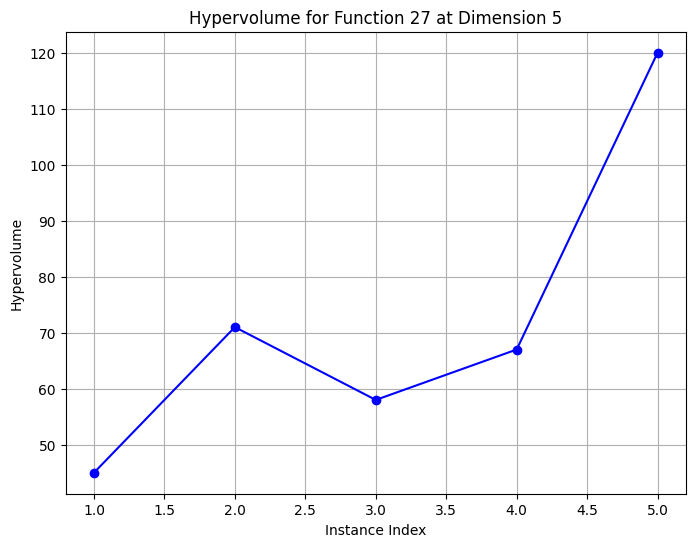

For function: 33 at dimension: 5 the values are:
 [(1, 102, 9500.0), (2, 102, 4700.0), (3, 102, 41000.0), (4, 103, 24000.0), (5, 104, 46000.0)]


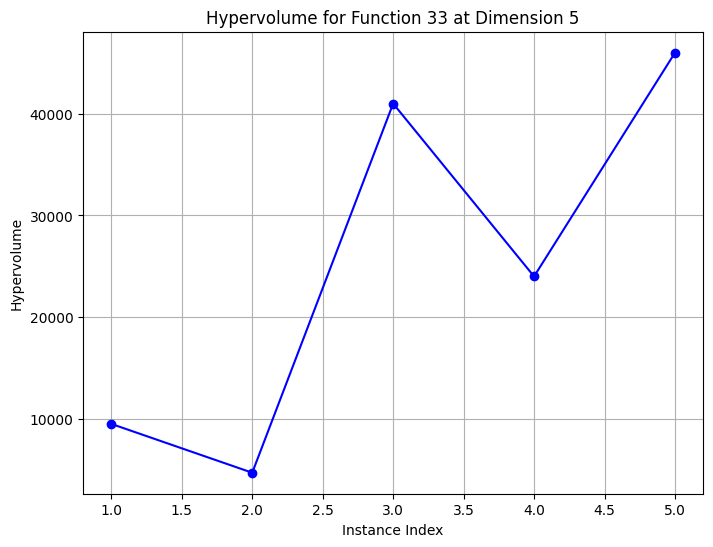

For function: 34 at dimension: 5 the values are:
 [(1, 102, 6000.0), (2, 101, 710.0), (3, 102, 580.0), (4, 101, 1800.0), (5, 101, 150.0)]


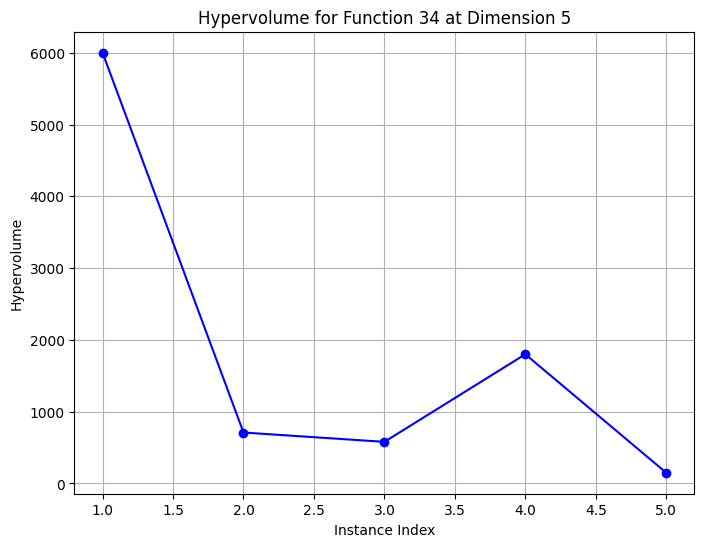

For function: 35 at dimension: 2 the values are:
 [(1, 53, 31.0), (2, 51, 4.1), (3, 52, 5.0), (4, 51, 7.0), (5, 53, 6.2)]


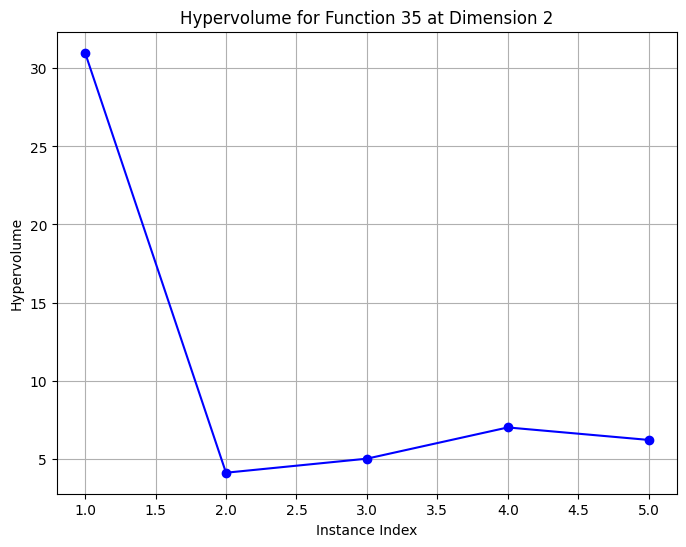

For function: 36 at dimension: 2 the values are:
 [(1, 52, 4.8), (2, 55, 6.2), (3, 52, 140.0), (4, 52, 5.0), (5, 55, 48.0)]


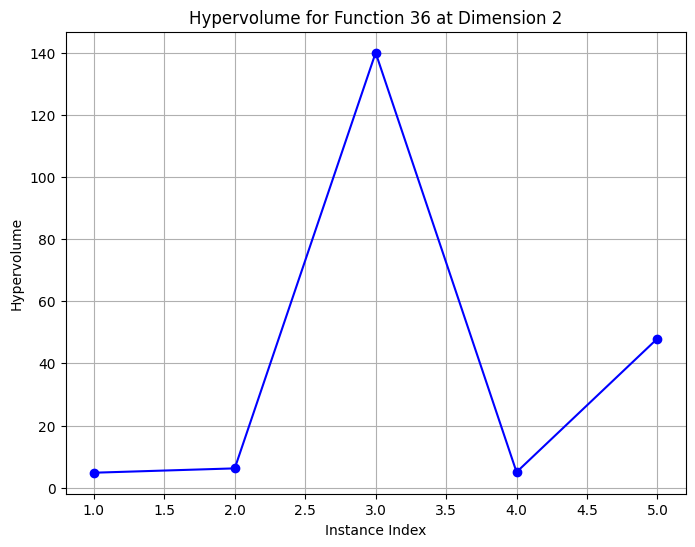

For function: 41 at dimension: 2 the values are:
 [(1, 53, 250.0), (2, 57, 93.0), (3, 56, 160.0), (4, 53, 210.0), (5, 54, 58.0)]


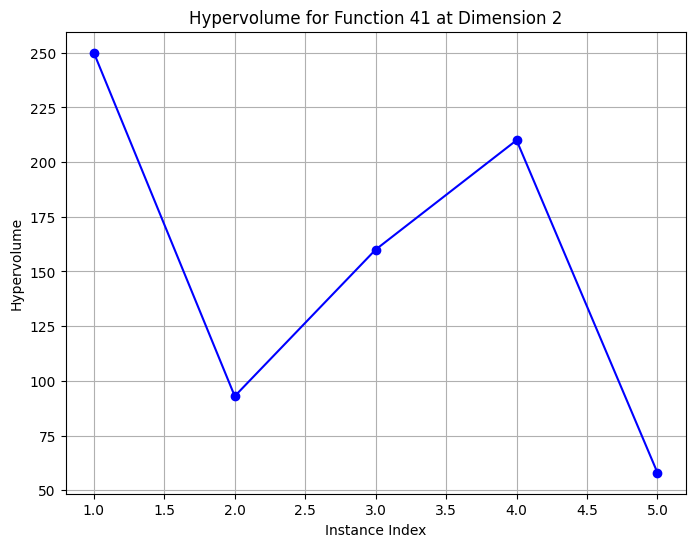

For function: 35 at dimension: 5 the values are:
 [(1, 106, 16.0), (2, 101, 5.7), (3, 103, 19.0), (4, 102, 10.0), (5, 103, 8.6)]


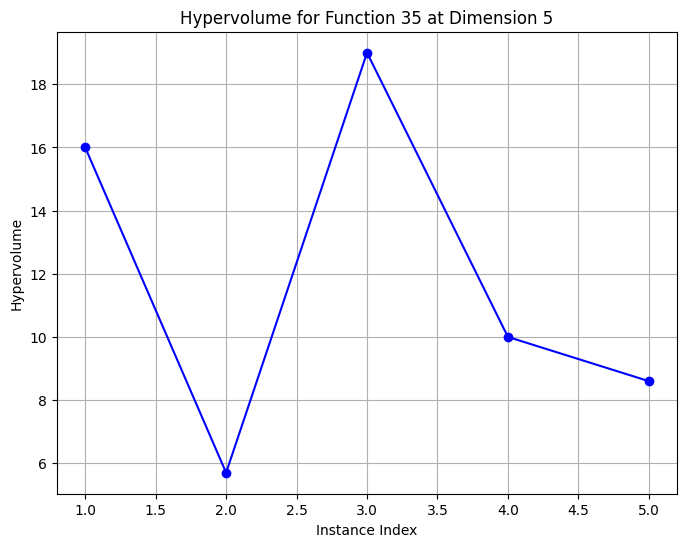

For function: 36 at dimension: 5 the values are:
 [(1, 105, 41.0), (2, 108, 41.0), (3, 105, 790.0), (4, 104, 24.0), (5, 102, 11.0)]


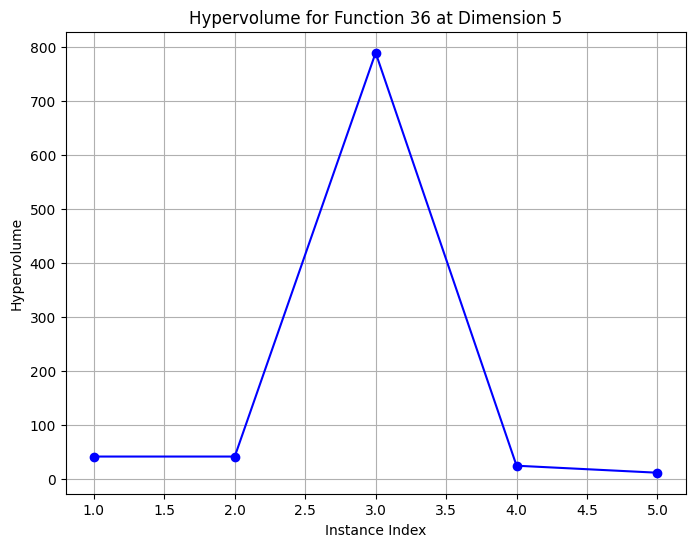

For function: 41 at dimension: 5 the values are:
 [(1, 108, 89.0), (2, 105, 430.0), (3, 106, 110.0), (4, 105, 350.0), (5, 104, 830.0)]


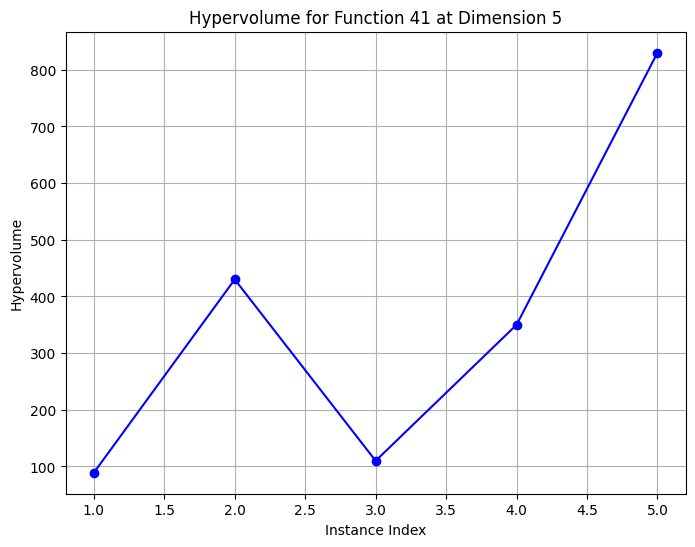

For function: 37 at dimension: 2 the values are:
 [(1, 54, 15.0), (2, 52, 25.0), (3, 52, 4.3), (4, 56, 97.0), (5, 52, 180.0)]


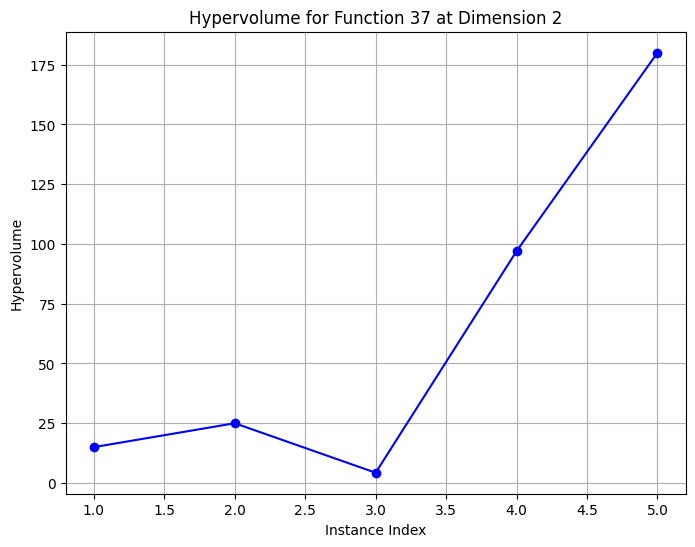

For function: 38 at dimension: 2 the values are:
 [(1, 52, 100.0), (2, 53, 61.0), (3, 51, 120.0), (4, 53, 120.0), (5, 52, 26.0)]


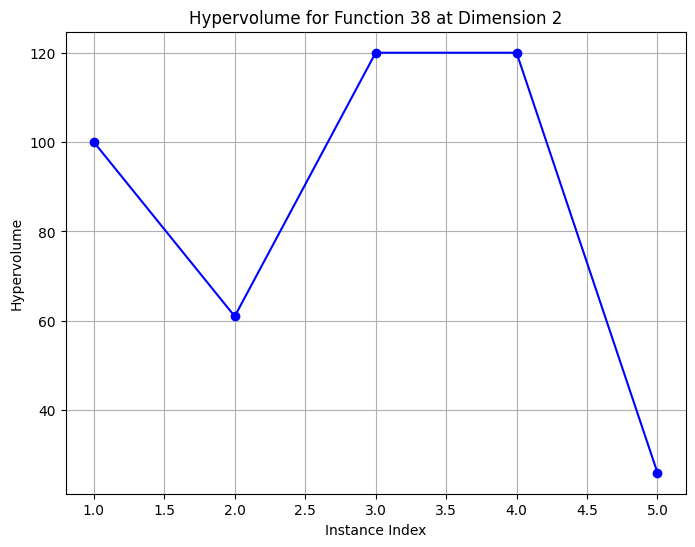

For function: 42 at dimension: 2 the values are:
 [(1, 53, 26.0), (2, 52, 130.0), (3, 56, 290.0), (4, 54, 140.0), (5, 51, 5.9)]


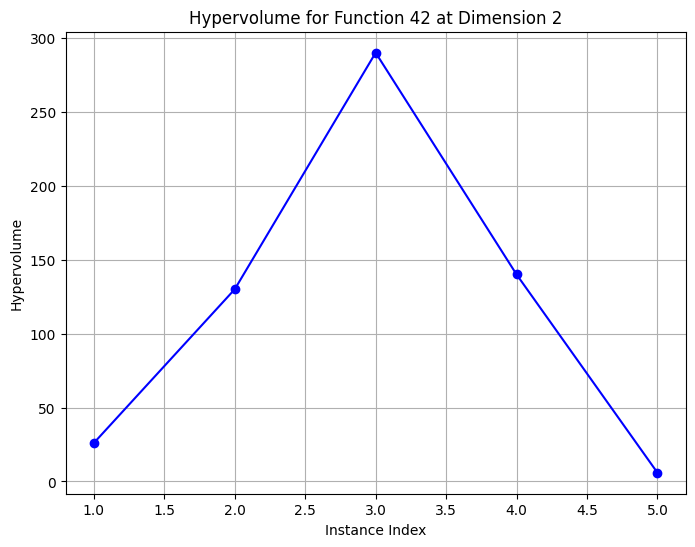

For function: 43 at dimension: 2 the values are:
 [(1, 51, 160.0), (2, 54, 160.0), (3, 54, 520.0), (4, 55, 310.0), (5, 51, 130.0)]


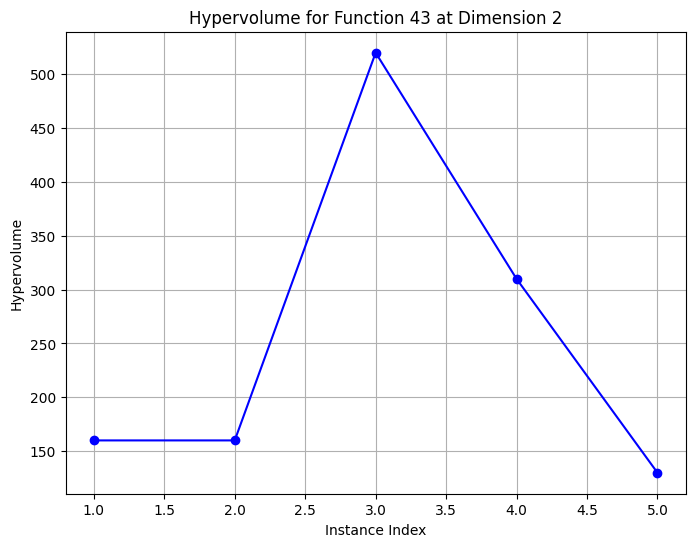

For function: 37 at dimension: 5 the values are:
 [(1, 101, 110.0), (2, 105, 48.0), (3, 110, 150.0), (4, 107, 68.0), (5, 105, 270.0)]


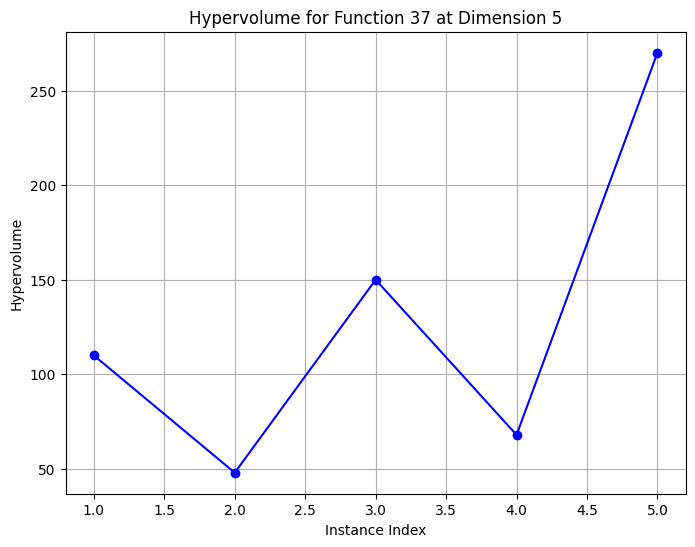

For function: 38 at dimension: 5 the values are:
 [(1, 107, 800.0), (2, 103, 3400.0), (3, 102, 1500.0), (4, 104, 3100.0), (5, 102, 2100.0)]


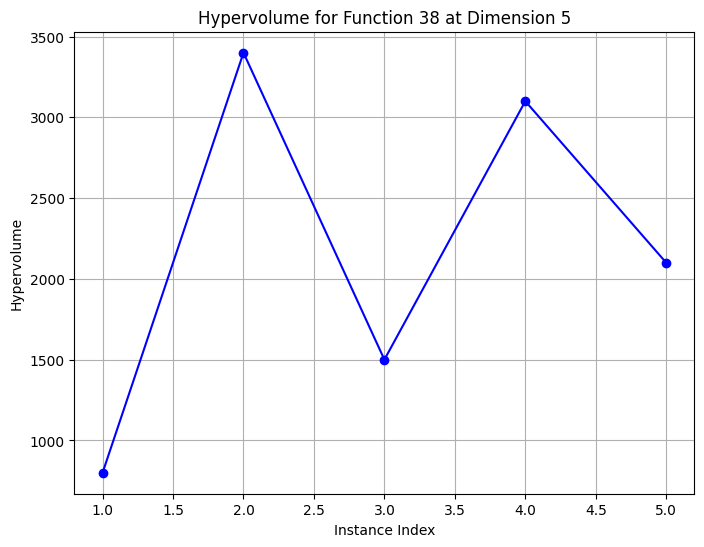

For function: 42 at dimension: 5 the values are:
 [(1, 105, 64.0), (2, 102, 310.0), (3, 104, 2200.0), (4, 108, 2500.0), (5, 104, 240.0)]


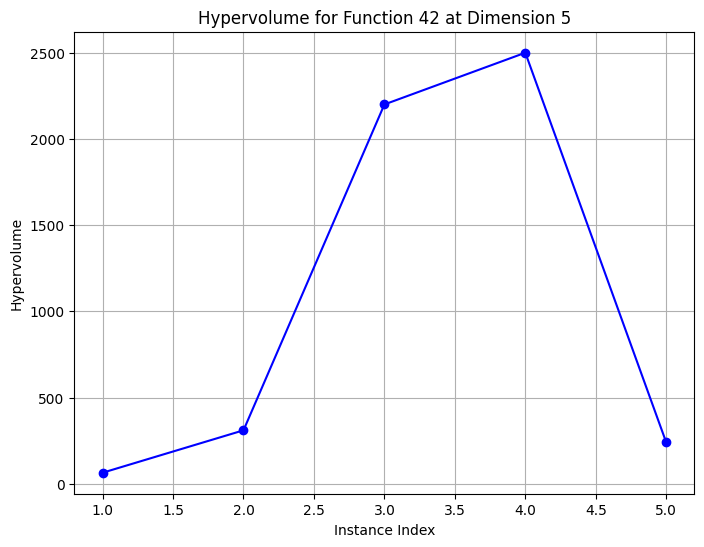

For function: 43 at dimension: 5 the values are:
 [(1, 106, 910.0), (2, 103, 4300.0), (3, 102, 680.0), (4, 104, 780.0), (5, 104, 3900.0)]


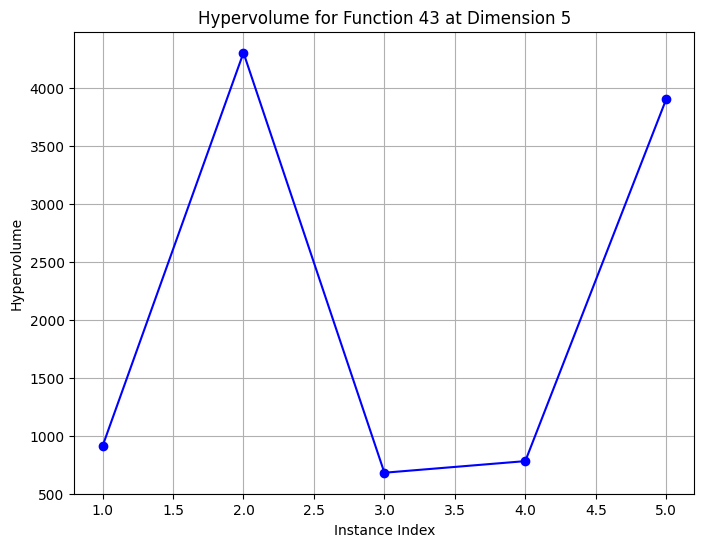

For function: 39 at dimension: 2 the values are:
 [(1, 51, 19.0), (2, 52, 450.0), (3, 54, 5100.0), (4, 51, 2200.0), (5, 52, 22.0)]


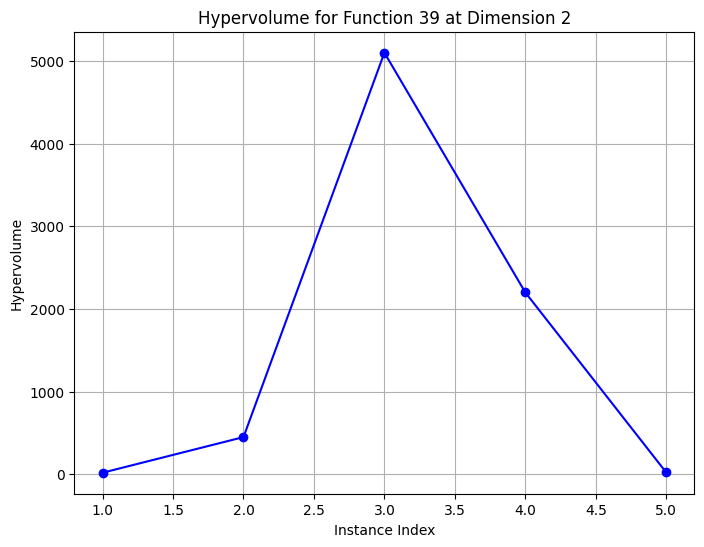

For function: 40 at dimension: 2 the values are:
 [(1, 53, 45.0), (2, 53, 30.0), (3, 51, 27.0), (4, 53, 110.0), (5, 52, 110.0)]


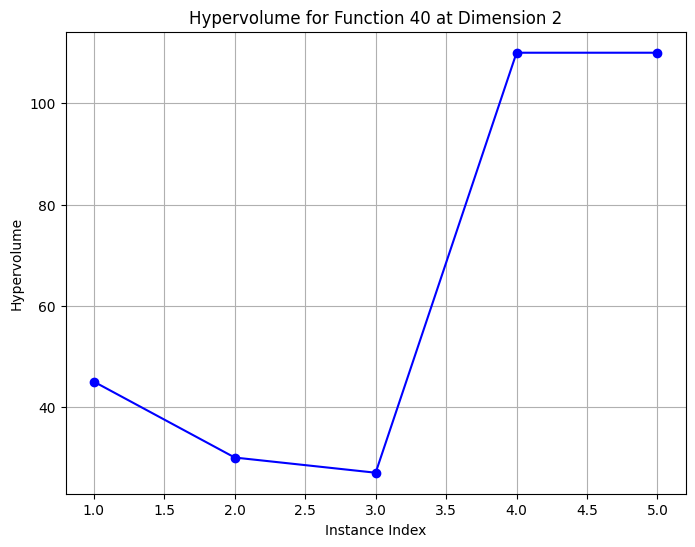

For function: 44 at dimension: 2 the values are:
 [(1, 52, 13.0), (2, 52, 820.0), (3, 52, 27.0), (4, 55, 23.0), (5, 54, 8500.0)]


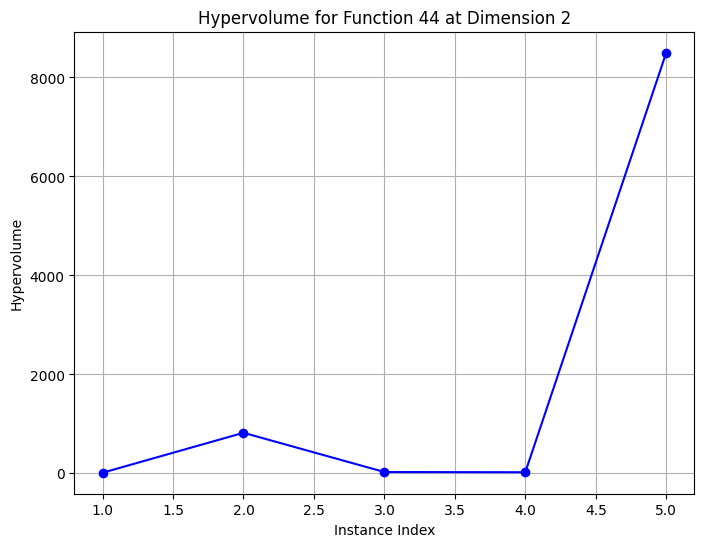

For function: 45 at dimension: 2 the values are:
 [(1, 52, 37.0), (2, 55, 80.0), (3, 55, 180.0), (4, 57, 64.0), (5, 51, 16.0)]


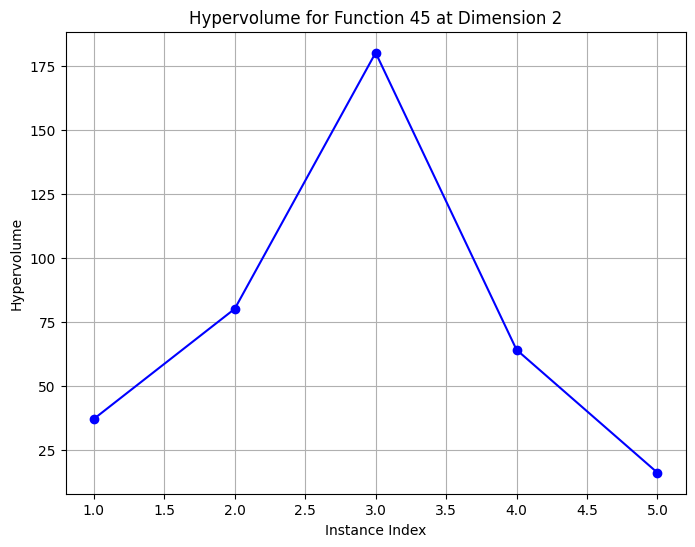

For function: 39 at dimension: 5 the values are:
 [(1, 104, 310.0), (2, 104, 240.0), (3, 102, 100.0), (4, 101, 130.0), (5, 105, 53.0)]


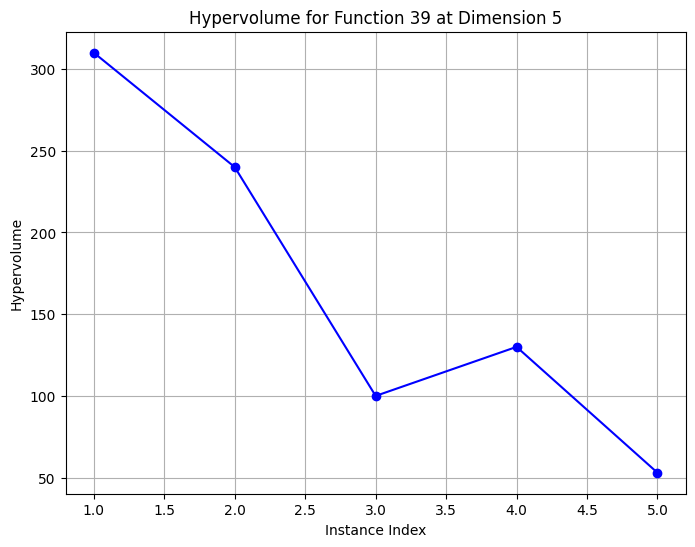

For function: 40 at dimension: 5 the values are:
 [(1, 101, 20.0), (2, 101, 25.0), (3, 102, 76.0), (4, 101, 26.0), (5, 101, 14.0)]


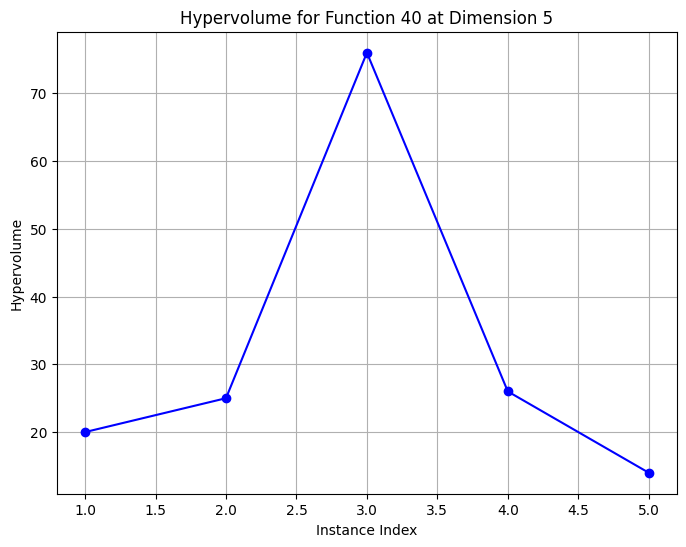

For function: 44 at dimension: 5 the values are:
 [(1, 103, 70.0), (2, 103, 240.0), (3, 102, 580.0), (4, 111, 320.0), (5, 104, 1000.0)]


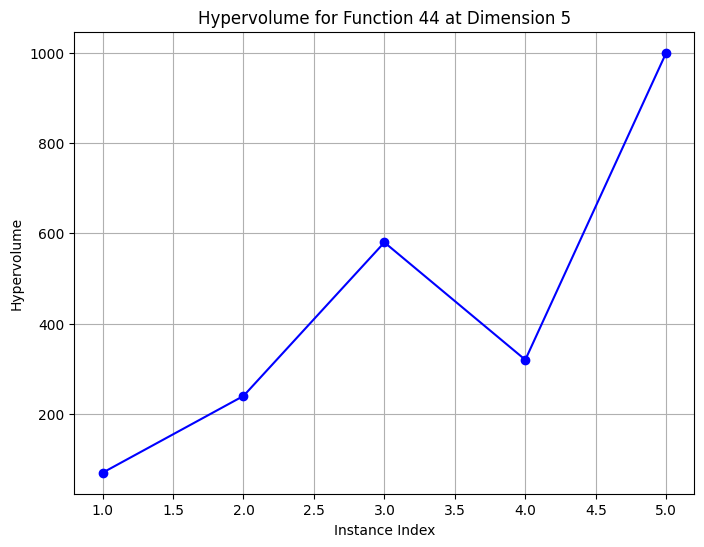

For function: 45 at dimension: 5 the values are:
 [(1, 106, 180.0), (2, 104, 760.0), (3, 101, 26.0), (4, 103, 140.0), (5, 101, 34.0)]


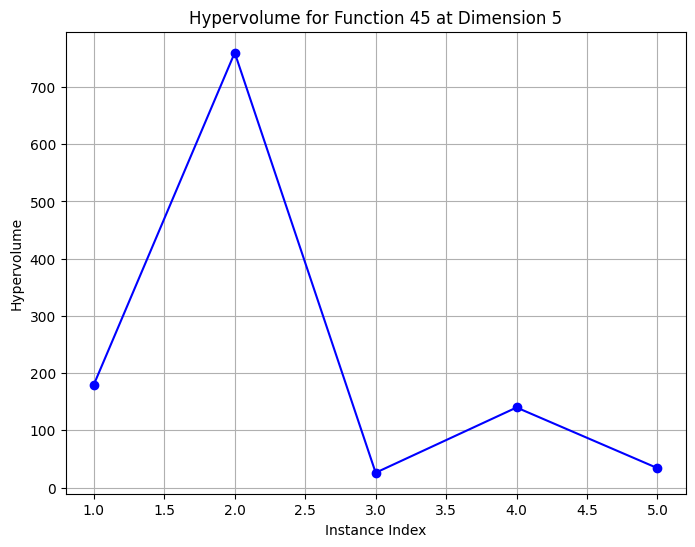

For function: 46 at dimension: 2 the values are:
 [(1, 56, 510.0), (2, 57, 390.0), (3, 53, 47.0), (4, 54, 130.0), (5, 53, 58.0)]


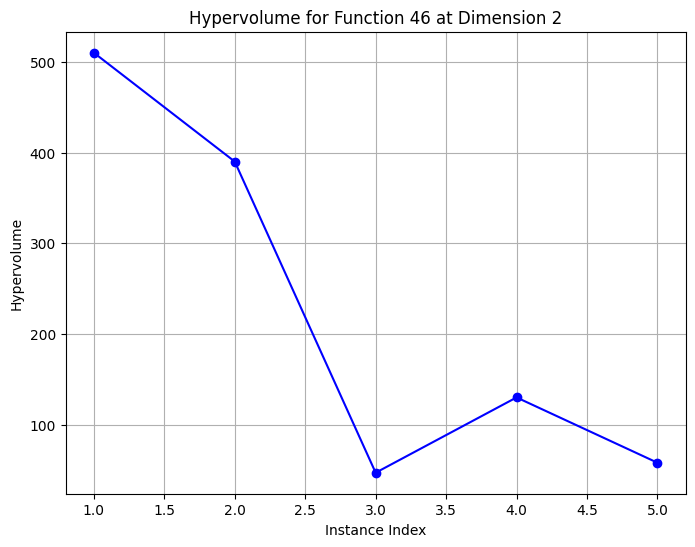

For function: 47 at dimension: 2 the values are:
 [(1, 52, 160.0), (2, 52, 300.0), (3, 53, 74.0), (4, 51, 70.0), (5, 54, 160.0)]


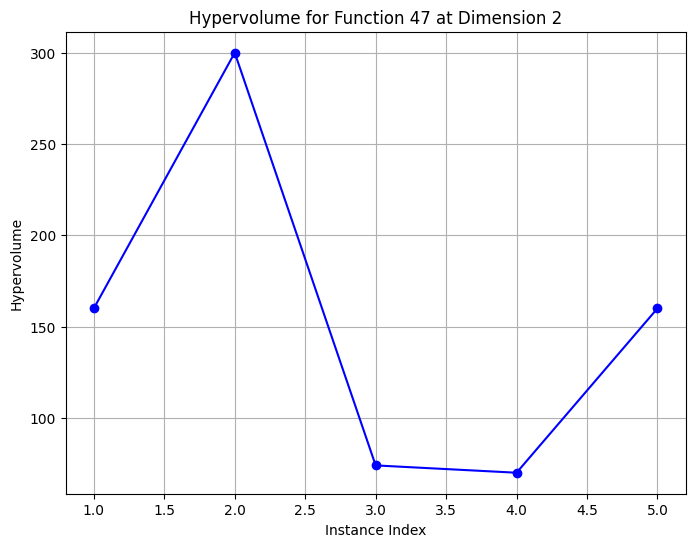

For function: 50 at dimension: 2 the values are:
 [(1, 52, 290.0), (2, 52, 110.0), (3, 52, 97.0), (4, 54, 570.0), (5, 51, 230.0)]


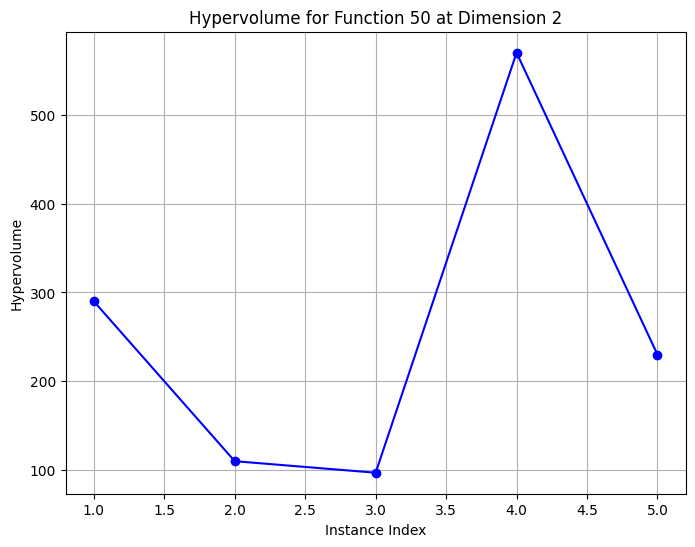

For function: 46 at dimension: 5 the values are:
 [(1, 110, 8600.0), (2, 102, 170.0), (3, 108, 2400.0), (4, 103, 370.0), (5, 103, 550.0)]


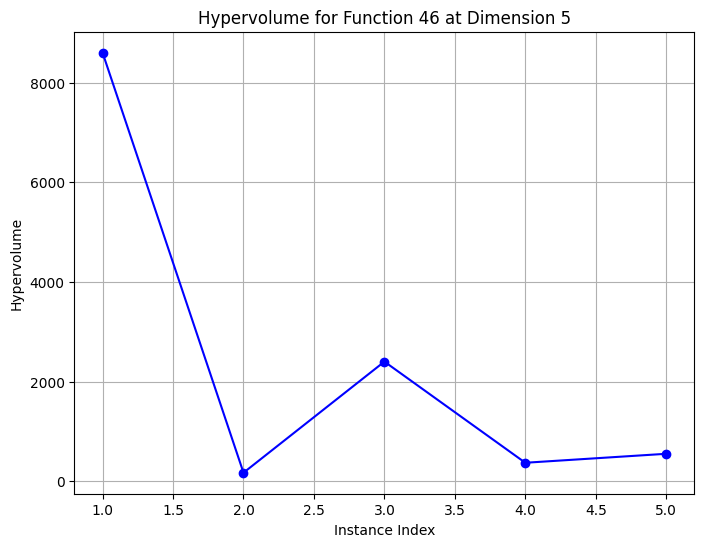

For function: 47 at dimension: 5 the values are:
 [(1, 103, 1000.0), (2, 102, 1800.0), (3, 108, 790.0), (4, 104, 2100.0), (5, 106, 2800.0)]


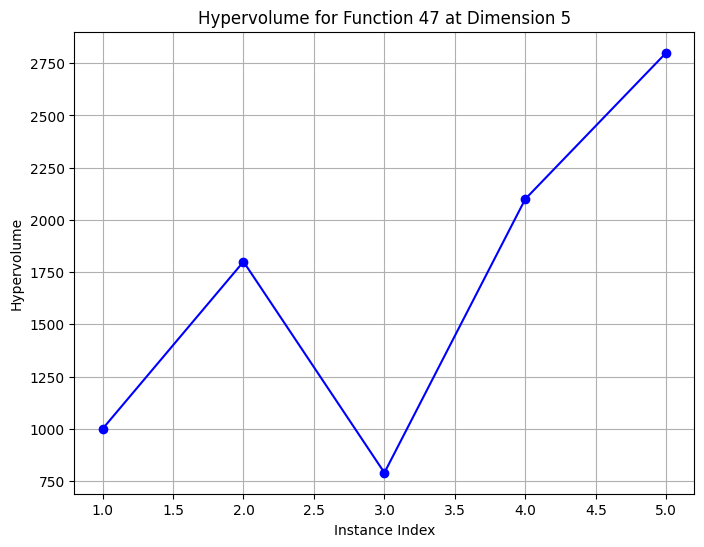

For function: 50 at dimension: 5 the values are:
 [(1, 102, 1400.0), (2, 101, 2400.0), (3, 101, 1000.0), (4, 105, 4400.0), (5, 103, 560.0)]


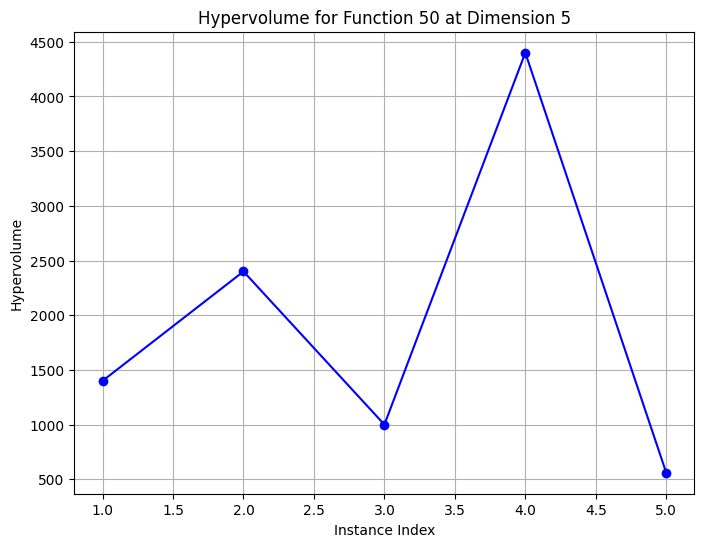

For function: 48 at dimension: 2 the values are:
 [(1, 51, 61000.0), (2, 53, 590.0), (3, 53, 13.0), (4, 53, 26.0), (5, 53, 320.0)]


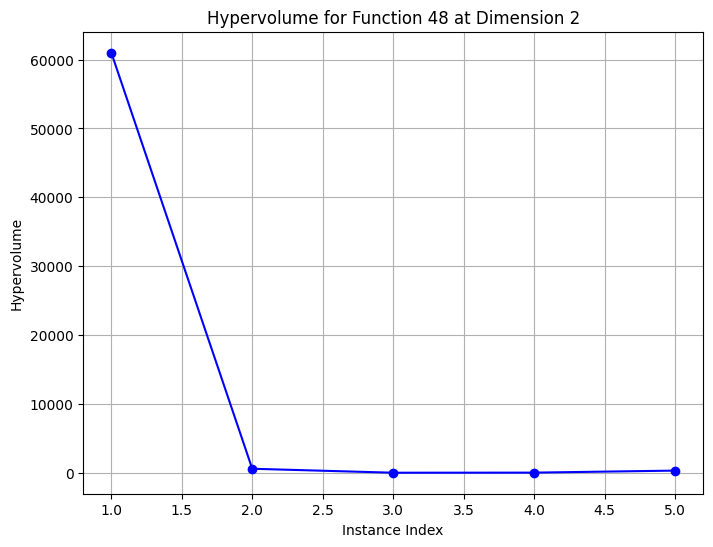

For function: 49 at dimension: 2 the values are:
 [(1, 53, 28.0), (2, 52, 46.0), (3, 54, 52.0), (4, 51, 8.4), (5, 54, 210.0)]


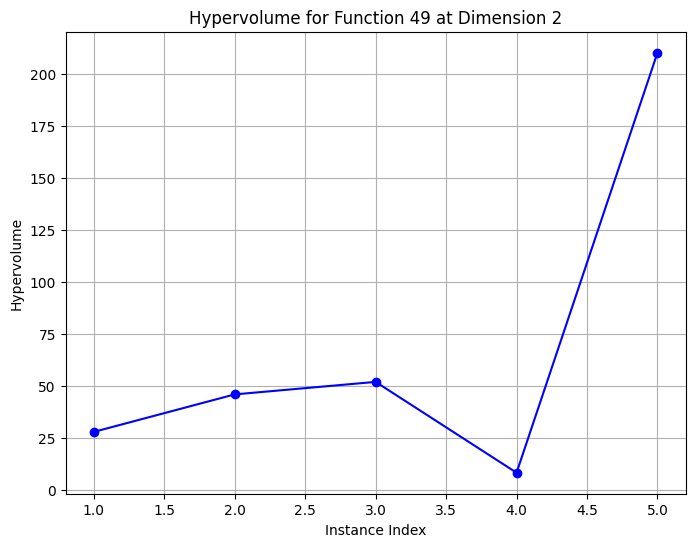

For function: 51 at dimension: 2 the values are:
 [(1, 53, 39.0), (2, 53, 64.0), (3, 53, 130.0), (4, 52, 96.0), (5, 52, 86.0)]


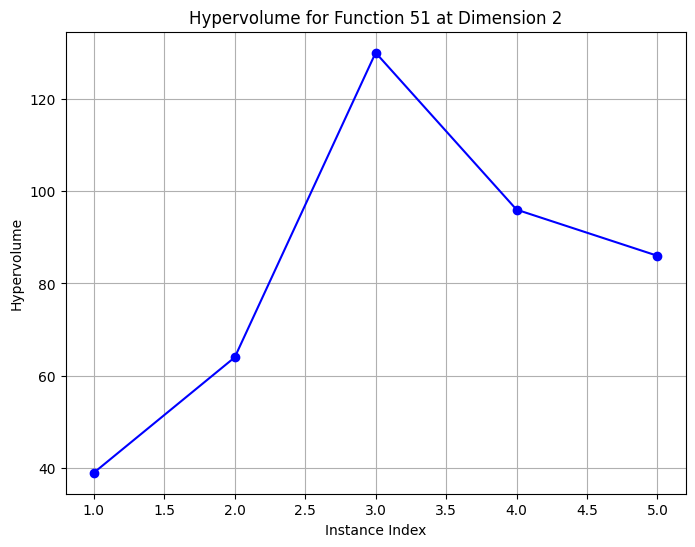

For function: 52 at dimension: 2 the values are:
 [(1, 51, 40.0), (2, 52, 130.0), (3, 52, 110.0), (4, 54, 370.0), (5, 51, 250.0)]


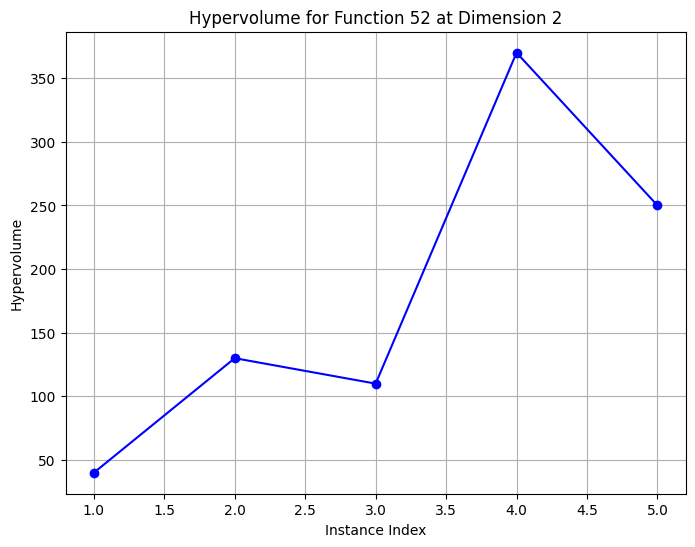

For function: 48 at dimension: 5 the values are:
 [(1, 103, 1300.0), (2, 109, 4000.0), (3, 107, 1200.0), (4, 104, 810.0), (5, 109, 860.0)]


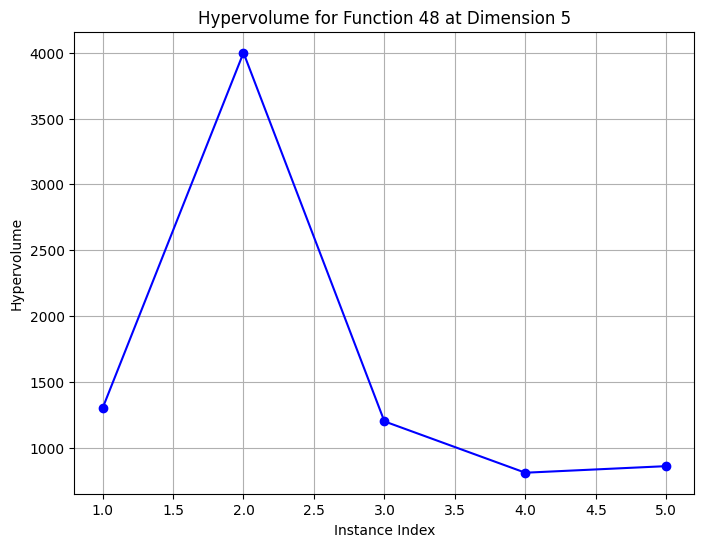

For function: 49 at dimension: 5 the values are:
 [(1, 102, 110.0), (2, 101, 400.0), (3, 105, 130.0), (4, 101, 33.0), (5, 104, 210.0)]


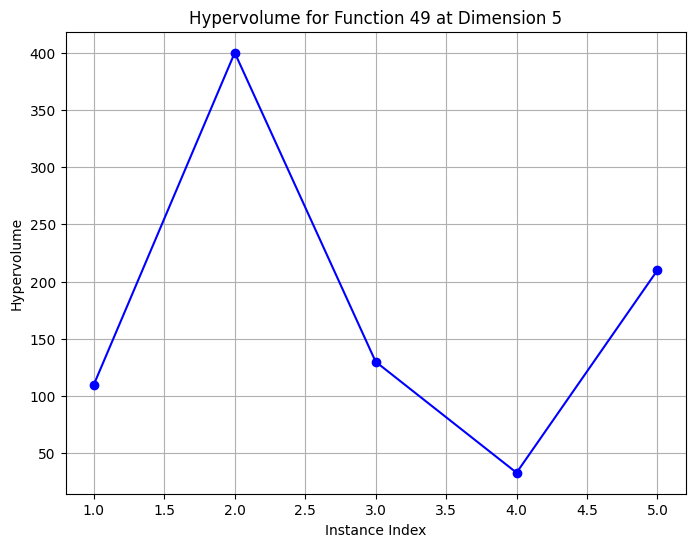

For function: 51 at dimension: 5 the values are:
 [(1, 103, 1600.0), (2, 101, 580.0), (3, 104, 5400.0), (4, 101, 410.0), (5, 103, 250.0)]


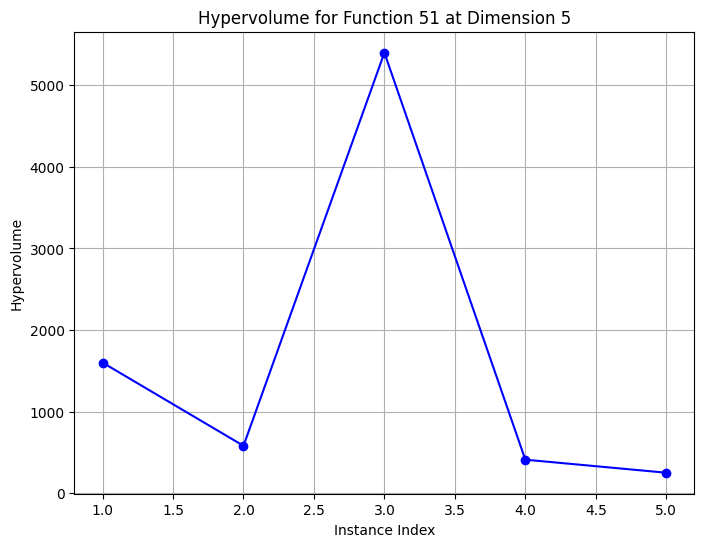

For function: 52 at dimension: 5 the values are:
 [(1, 104, 3600.0), (2, 102, 4300.0), (3, 102, 1900.0), (4, 101, 200.0), (5, 102, 610.0)]


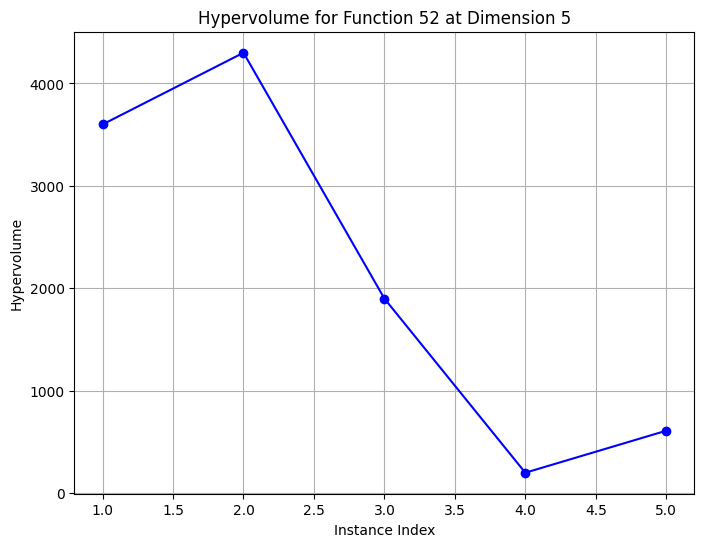

For function: 53 at dimension: 2 the values are:
 [(1, 52, 19.0), (2, 51, 11.0), (3, 51, 11.0), (4, 52, 25.0), (5, 52, 150000.0)]


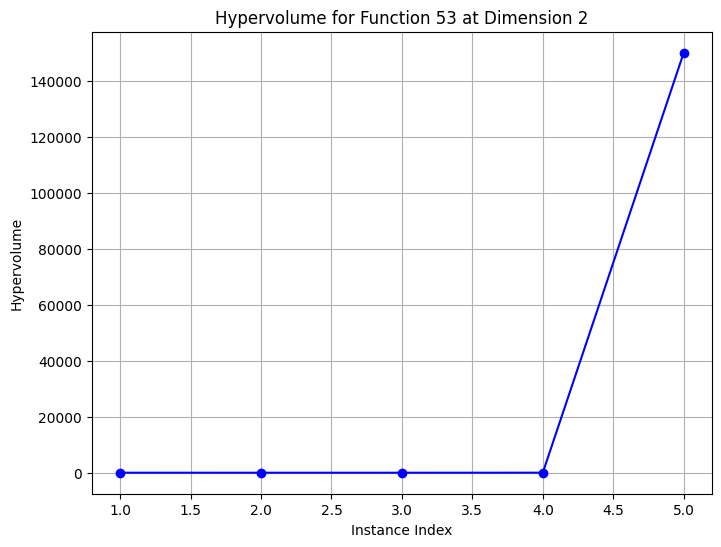

For function: 54 at dimension: 2 the values are:
 [(1, 54, 25.0), (2, 54, 120.0), (3, 54, 8000.0), (4, 54, 39.0), (5, 53, 330.0)]


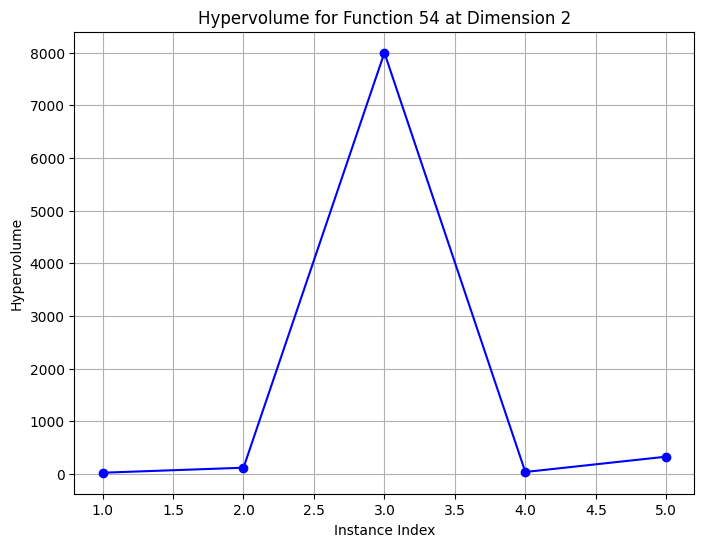

For function: 55 at dimension: 2 the values are:
 [(1, 51, 21.0), (2, 51, 26.0), (3, 51, 17.0), (4, 51, 26.0), (5, 51, 30.0)]


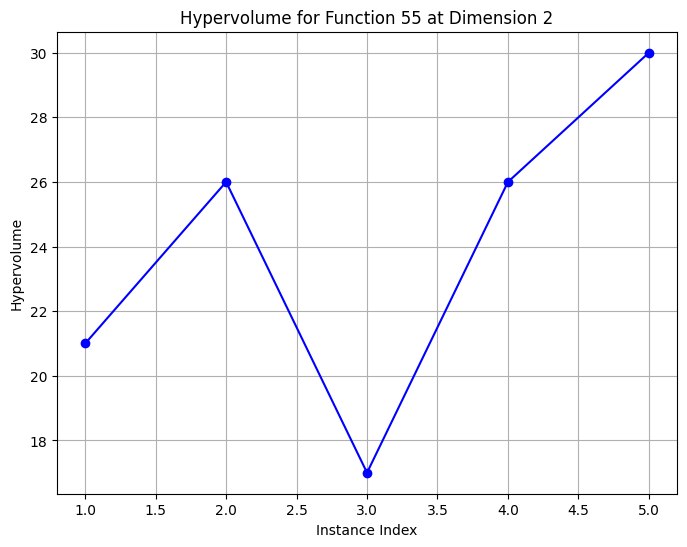

For function: 53 at dimension: 5 the values are:
 [(1, 102, 20000.0), (2, 101, 170.0), (3, 101, 130.0), (4, 101, 480.0), (5, 102, 260.0)]


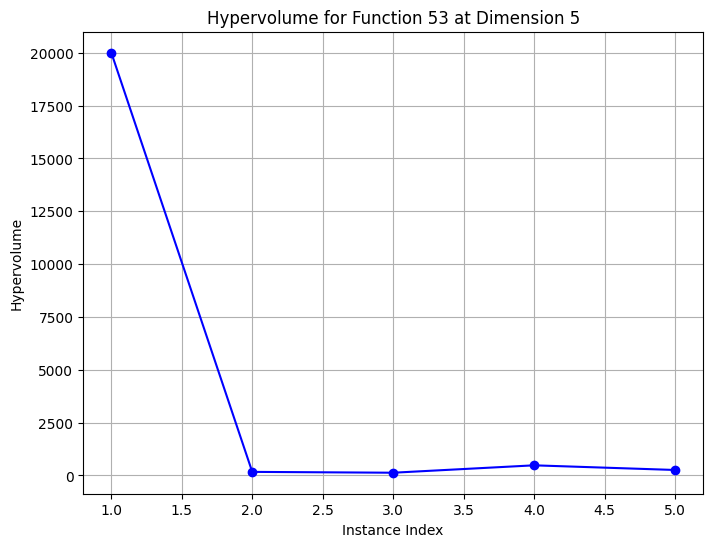

For function: 54 at dimension: 5 the values are:
 [(1, 102, 160.0), (2, 102, 100.0), (3, 101, 58.0), (4, 101, 110.0), (5, 101, 59.0)]


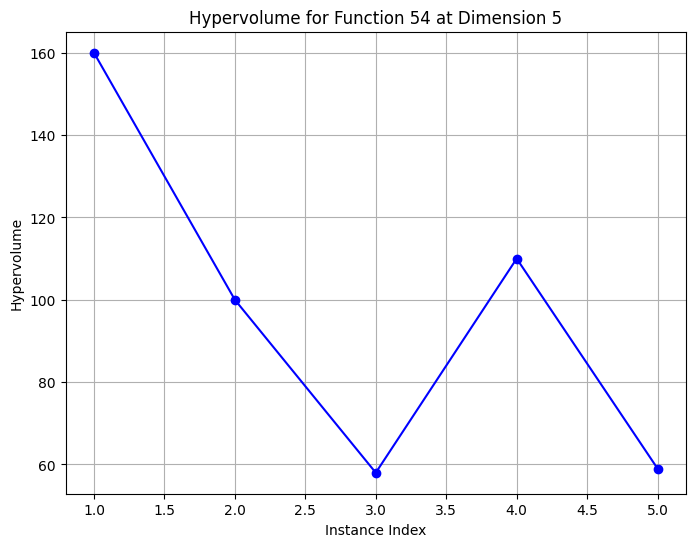

For function: 55 at dimension: 5 the values are:
 [(1, 101, 290.0), (2, 101, 100.0), (3, 101, 93.0), (4, 101, 82.0), (5, 101, 81.0)]


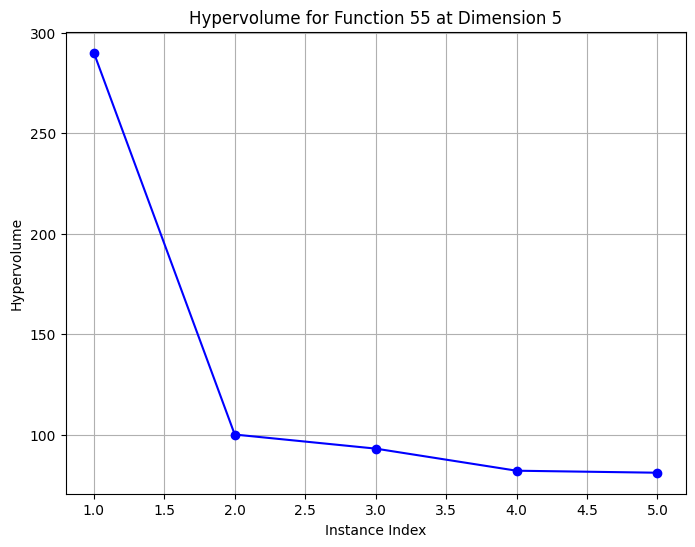

In [63]:
# Collect and plot data
for f in get_hyp_files('exdata/pymoo_nsga2_on_bbob-biobj/'):
    d = read_hyp_file(f)['functions']
    for f_d in d:
        func = f_d['function']
        dim = f_d['dimension']
        data = f_d['data_pairs']
    
        print('For function:', func, 'at dimension:', dim, 'the values are:\n', data)
        plot_hypervolumes(data, func, dim)


### Plot each function sharing same dimension on the same graph

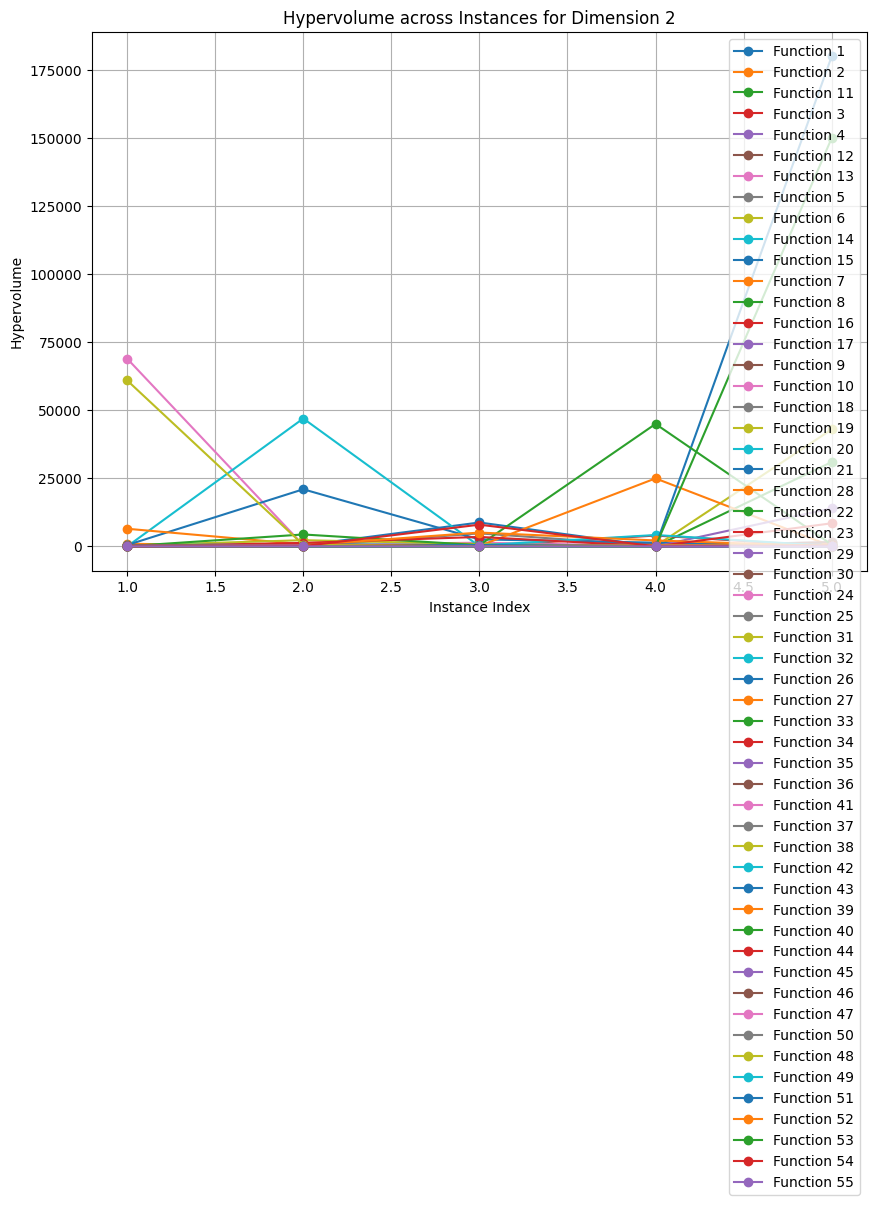

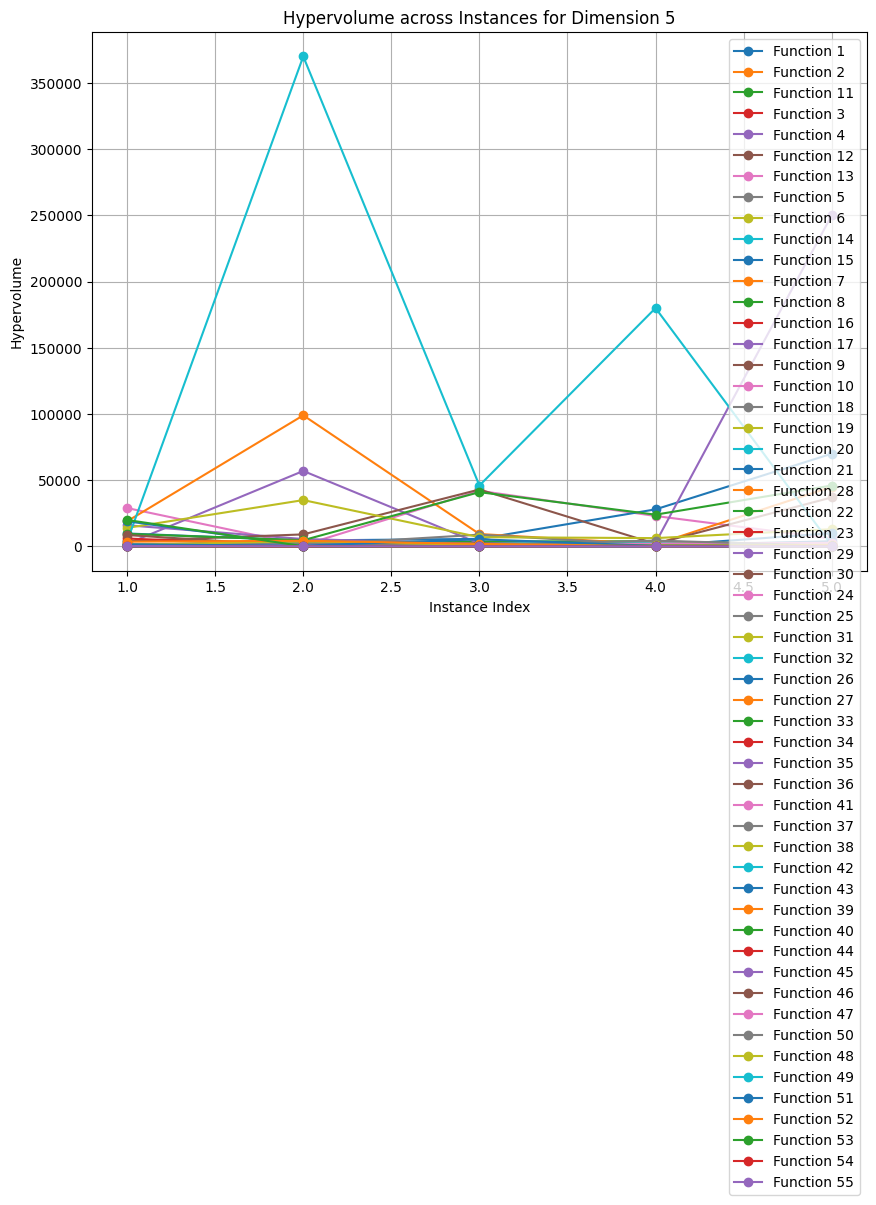

In [46]:
# Collect data by dimension for plotting all functions
dimension_groups = defaultdict(lambda: defaultdict(list))

for f in get_hyp_files('exdata/pymoo_nsga2_on_bbob-biobj/'):
    all_functions_data = read_hyp_file(f)['functions']
    for f_d in all_functions_data:
        func = f_d['function']
        dim = f_d['dimension']
        data = f_d['data_pairs']
        
        # Store data by dimension and function
        dimension_groups[dim][func].extend(data)

# Plot each dimension group (all functions within a dimension)
for dim, func_data in dimension_groups.items():
    plot_hypervolumes_by_dimension(func_data, dim)

### Plot the mean value of all the function sharing the same dimension, on 1 plot

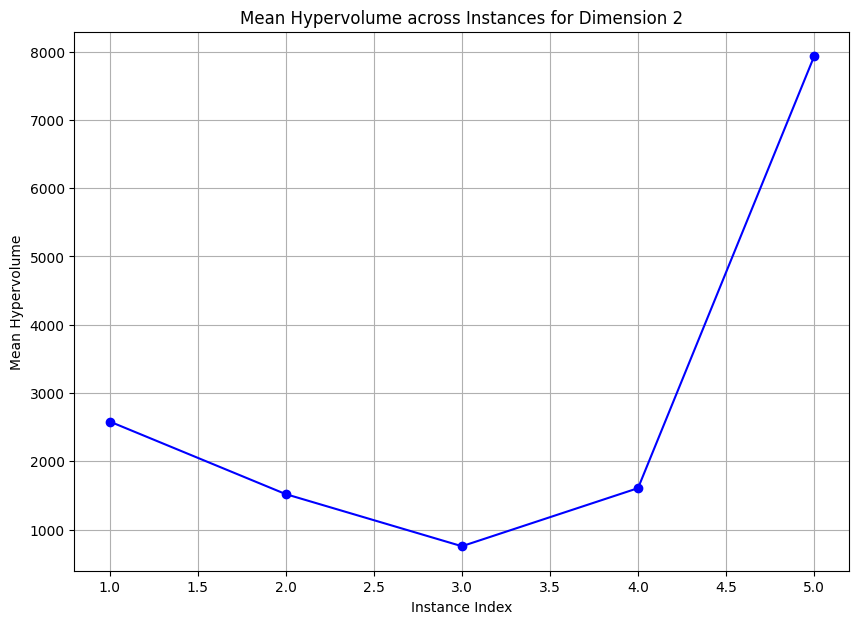

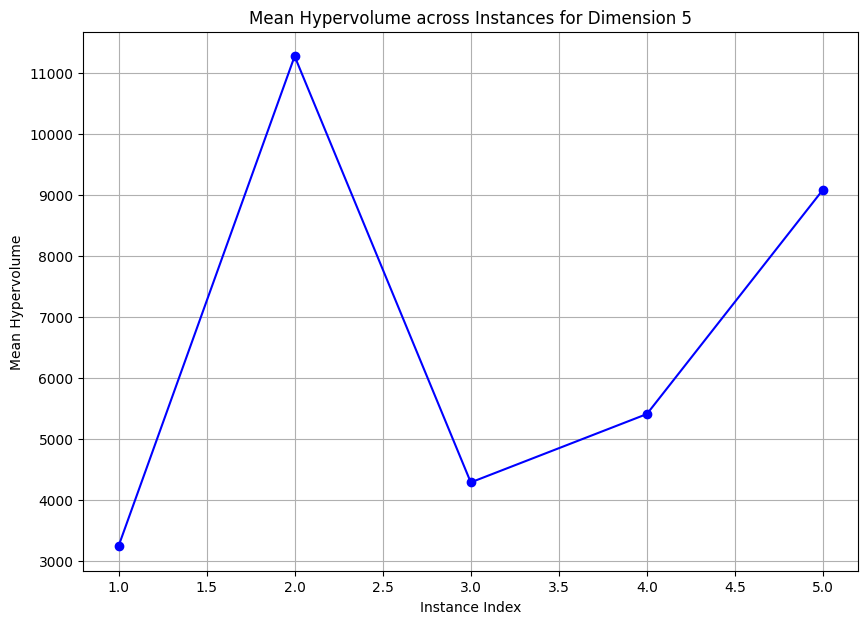

In [47]:
# Collect data by dimension and calculate mean across all functions correctly
dimension_means = defaultdict(lambda: defaultdict(list))

for f in get_hyp_files('exdata/pymoo_nsga2_on_bbob-biobj/'):
    all_functions_data = read_hyp_file(f)['functions']
    for f_d in all_functions_data:
        func = f_d['function']
        dim = f_d['dimension']
        data = f_d['data_pairs']
        
        # Store hypervolume values by dimension and instance across all functions
        for instance, eval_step, hypervolume in data:
            dimension_means[dim][instance].append(hypervolume)

# Calculate and plot the mean for each dimension
for dim, instance_data in dimension_means.items():
    # Calculate mean hypervolume for each instance
    mean_hypervolumes = {instance: sum(values) / len(values) for instance, values in instance_data.items()}
    plot_mean_hypervolumes_by_dimension(mean_hypervolumes, dim)
